# ngc6752 공작자리 구상성단

## ngc6752 Introduction

**개요** 

- 관측 정보
  + 적경: 19h 10m 52.11s
  + 적위: -59° 59’ 4.4”
  + 별자리: 공작자리
- 물리적 성질
  + 형태: VI형 구상성단
  + 거리: 13,000 광년 (4,000 파섹)
  + 지름: 100 광년
  + 겉보기 크기: 20.4'
  + 겉보기 등급: 5.4

NGC 6752/공작자리 대성단

NGC 7006은 공작자리 방향으로 약 13,000 광년 떨어져 있는 VI형 구상성단이다.


**상세**

천구에서 오메가 센타우리, 큰부리새자리 47, 메시에 22 다음인 4번째로 밝은 구상성단으로 1826년 6월 30일에 제임스 던롭에 의해 처음 발견되었다.

질량 분리[2]를 겪은 것으로 추정되며 밀집도는 중간급 정도이다. 약 십만개의 항성들을 지니고 있으며 그중 청색 낙오성[3]과 여러 쌍성들이 발견되었다. 그리고 찬드라 X선 망원경을 이용한 관측에서는 중심 부분에 6개의 X선 소스가 확인되었다고 한다.

나이는 117억 8천만년으로 추정되며 구상성단중 오래된 편에 속한다.

성단 뒤쪽에는 베딘 I라는 이름을 가진 왜소은하가 있는데 가장 가까운 은하인 NGC 6744에서 2백만 광년 떨어져 있는, 처녀자리 초은하단에서 제일 고립된 은하라는 타이틀을 가지고 있다. 생성시기는 대략 115억년으로 추정되며 나이도 엄청 많은데다 작고 흡수할 더 작은 은하조차 없기 때문에 별 생성활동이 없는, 사실상 죽은 은하이다.

기상이 좋으면 맨눈으로 보이며 공작자리 오메가에서 동쪽으로 1.5도 떨어져 있다. 하지만 대한민국 영토에선 관측이 불가능하다.




> [출처] https://namu.wiki/w/NGC%206752
>
> [참고] https://people.smp.uq.edu.au/HolgerBaumgardt/globular/fits/ngc6752.html

##  Reference

- https://archive.stsci.edu/prepds/hugs/

- https://github.com/laingmic005/aperture-photometry/blob/main/L1_fits-handling.ipynb

- https://youtu.be/_DzSIeruotQ?si=ScAl1J5rSqyIt_ap


# 1. 데이터 전처리

In [1]:
import os

# 대상 폴더 경로 설정
folder_path = '/Users/younghokim/astro/prj1_HUGS/HUGS/ngc6752'

# 폴더 내의 모든 파일 및 폴더 목록을 가져옴
files = os.listdir(folder_path)
list_files = []

# 모든 파일명 출력
for file in files:
    if file.endswith('.fits'):
        list_files.append(file)
        print(file)

hlsp_hugs_hst_acs-wfc_ngc6752_f435w_v1_stack-0380s.fits
hlsp_hugs_hst_wfc3-uvis_ngc6752_f336w_v1_stack-0500s.fits
hlsp_hugs_hst_wfc3-uvis_ngc6752_f275w_v1_stack-0369s.fits
hlsp_hugs_hst_acs-wfc_ngc6752_f435w_v1_stack-0010s.fits


In [2]:
import os
os.getcwd()

'/Users/younghokim/astro/prj1_HUGS'

In [3]:
import pandas as pd

# 열에서 보여주는 문자열의 최대 길이 설정 (예: 100)
pd.set_option('display.max_colwidth', 100)

list_files_df = pd.Series(list_files)

In [4]:
os.listdir(folder_path)

['hlsp_hugs_hst_wfc3-uvis_ngc6752_multi_v1_cmd.png',
 'hlsp_hugs_hst_acs-wfc_ngc6752_f435w_v1_stack-0380s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc6752_f336w_v1_stack-0500s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc6752_multi_v1_rgb.png',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6752_multi_v1_catalog-meth1.txt',
 'hlsp_hugs_hst_wfc3-uvis_ngc6752_f275w_v1_stack-0369s.fits',
 'hlsp_hugs_hst_acs-wfc_ngc6752_f435w_v1_stack-0010s.fits',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6752_multi_v1_catalog-meth2.txt',
 'hlsp_hugs_hst_wfc3-uvis_ngc6752_multi_v1_rgb.tif',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6752_multi_v1_catalog-meth3.txt']

---

- hlsp_hugs_hst_wfc3-uvis_ngc6752_f275w_v1_stack-0369s.fits

- hlsp_hugs_hst_wfc3-uvis_ngc6752_f336w_v1_stack-0500s.fits

- hlsp_hugs_hst_acs-wfc_ngc6752_f435w_v1_stack-0380s.fits




위 3개의 파일을 활용

## 1.1 Fits 파일 불러오기

In [5]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Target filter는 275w, 336w, 438w 
print(list_files_df)

0      hlsp_hugs_hst_acs-wfc_ngc6752_f435w_v1_stack-0380s.fits
1    hlsp_hugs_hst_wfc3-uvis_ngc6752_f336w_v1_stack-0500s.fits
2    hlsp_hugs_hst_wfc3-uvis_ngc6752_f275w_v1_stack-0369s.fits
3      hlsp_hugs_hst_acs-wfc_ngc6752_f435w_v1_stack-0010s.fits
dtype: object


In [6]:
# fits 파일 열기 
fits_f275w = fits.open('HUGS/ngc6752/hlsp_hugs_hst_wfc3-uvis_ngc6752_f275w_v1_stack-0369s.fits')
fits_f336w = fits.open('HUGS/ngc6752/hlsp_hugs_hst_wfc3-uvis_ngc6752_f336w_v1_stack-0500s.fits')
fits_f435w = fits.open('HUGS/ngc6752/hlsp_hugs_hst_acs-wfc_ngc6752_f435w_v1_stack-0380s.fits')

In [7]:
print(fits_f275w)
print(fits_f336w)
print(fits_f435w)

In [8]:
# FITS 파일 안의 첫 번째 헤더 (Primary Header)에서 적경과 적위 정보 읽기
header_f275w = fits_f275w[0].header
header_f336w = fits_f336w[0].header
header_f435w = fits_f435w[0].header
 
ra_f275w = header_f275w['RA_TARG']  # 적경 정보
dec_f275w = header_f275w['DEC_TARG']  # 적위 정보

ra_f336w = header_f336w['RA_TARG']  # 적경 정보
dec_f336w = header_f336w['DEC_TARG']  # 적위 정보

ra_f435w = header_f435w['RA_TARG']  # 적경 정보
dec_f435w = header_f435w['DEC_TARG']  # 적위 정보


# 정보 출력
print(f'Right Ascension of fits_f275w (RA): {ra_f275w}')
print(f'Declination of fits_f275w (Dec): {dec_f275w}')

print(f'Right Ascension of fits_f336w (RA): {ra_f336w}')
print(f'Declination of fits_f336w (Dec): {dec_f336w}')

print(f'Right Ascension of fits_f435w (RA): {ra_f435w}')
print(f'Declination of fits_f435w (Dec): {dec_f435w}')


Right Ascension of fits_f275w (RA): 287.717125
Declination of fits_f275w (Dec): -59.98455555555556
Right Ascension of fits_f336w (RA): 287.717125
Declination of fits_f336w (Dec): -59.98455555555556
Right Ascension of fits_f435w (RA): 287.717125
Declination of fits_f435w (Dec): -59.98455555555556


In [9]:
# f275w 필터 이미지 데이터 EDA

image_data_f275w = fits_f275w[0].data
print(image_data_f275w)
print(type(image_data_f275w))
print(image_data_f275w.shape)

# f336w 필터 이미지 데이터 EDA

image_data_f336w = fits_f336w[0].data
print(image_data_f336w)
print(type(image_data_f336w))
print(image_data_f336w.shape)

# f435w 필터 이미지 데이터 EDA

image_data_f435w = fits_f435w[0].data
print(image_data_f435w)
print(type(image_data_f435w))
print(image_data_f435w.shape)


[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]
<class 'numpy.ndarray'>
(10000, 10000)
[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]
<class 'numpy.ndarray'>
(10000, 10000)
[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]
<class 'numpy.ndarray'>
(10000, 10000)


3개의 fits 파일 모두 같은 천체를 바라보고 있는 점을 확인

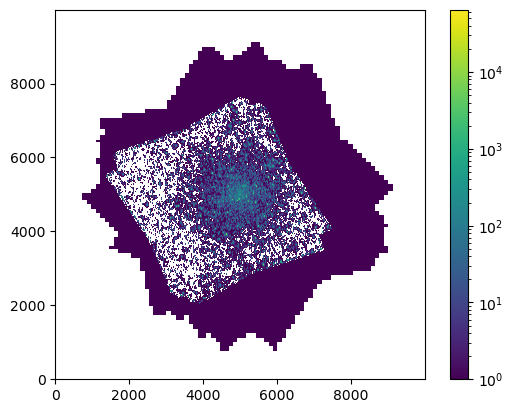

In [10]:
# matplotlib를 이용하여 구상성단의 모습 나타내기
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data_f275w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

In [11]:
image_data_center_f275w = image_data_f275w[4000:6000, 4000:6000]

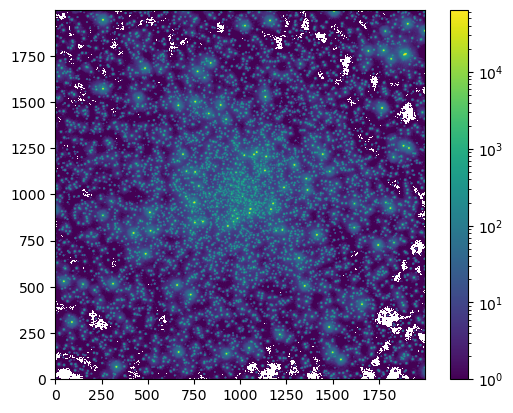

In [12]:
# 센터 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data_center_f275w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

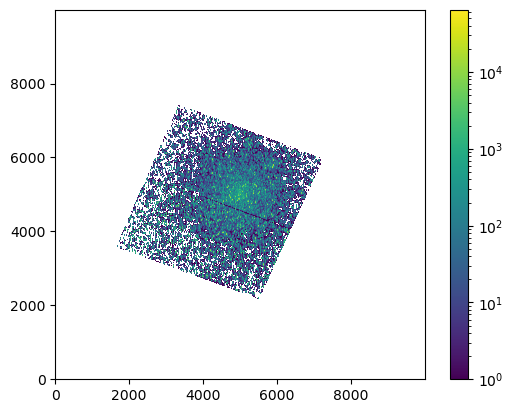

In [13]:
# matplotlib를 이용하여 구상성단의 모습 나타내기
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data_f336w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

In [14]:
image_data_center_f336w = image_data_f336w[4000:6000, 4000:6000]

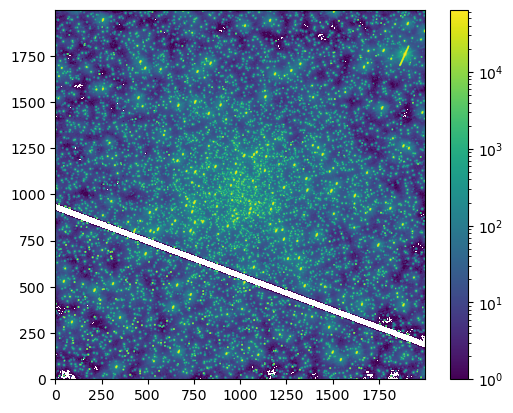

In [15]:
# 센터 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data_center_f336w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

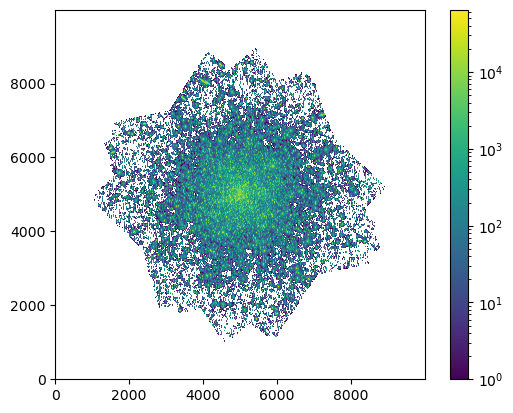

In [16]:
# matplotlib를 이용하여 구상성단의 모습 나타내기
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data_f435w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

In [17]:
image_data_center_f435w = image_data_f435w[4000:6000, 4000:6000]

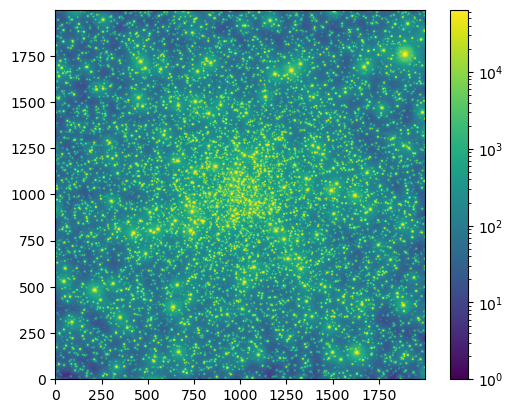

In [18]:
# 센터 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data_center_f435w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

- plt.imshow()에서 origin의 역할
  
> plt.imshow() 함수에서 origin 매개변수는 이미지를 표시할 때 픽셀 좌표 시스템의 원점을 어디에 두는지를 지정하는 역할을 합니다. 이 매개변수는 이미지의 표시 방향을 제어하기 위해 사용됩니다.
>
> origin='upper' (기본값): 좌측 상단 모서리를 원점으로 간주합니다. 이 경우, 픽셀 좌표는 왼쪽 상단 모서리에서 시작하여 아래쪽으로 행이 증가하고 오른쪽으로 열이 증가합니다. 이것은 일반적인 이미지 표시 방식과는 다릅니다.
>
> origin='lower': 좌측 하단 모서리를 원점으로 간주합니다. 이 경우, 픽셀 좌표는 왼쪽 하단 모서리에서 시작하여 위쪽으로 행이 증가하고 오른쪽으로 열이 증가합니다. 이것은 일반적인 이미지 표시 방식과 일치합니다.
>
> 대부분의 경우, 이미지 데이터는 origin='upper'로 저장되어 있기 때문에 origin 매개변수를 따로 지정할 필요가 없습니다. 그러나 이미지 데이터가 origin='lower'로 저장되어 있는 경우, 표시 방식을 올바르게 하기 위해 이 매개변수를 설정할 수 있습니다.

## 1.2 그레이 스케일로 나타내기

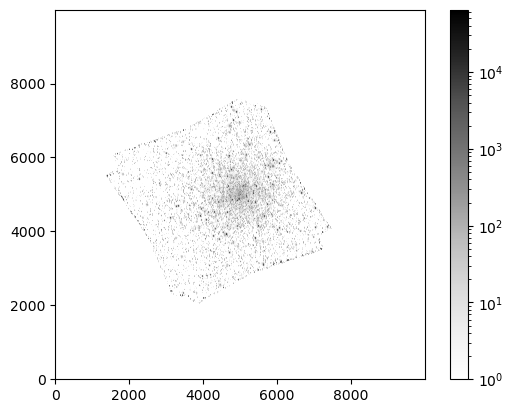

In [19]:
# cmap을 'Greys'로 바꾸고 norm을 LogNorm으로 바꾸기
# 데이터의 범위, order가 넓다 보니 LogNorm으로 정규화함

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Greys 컬러맵의 f275w 이미지 

plt.figure()
plt.imshow(image_data_f275w, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

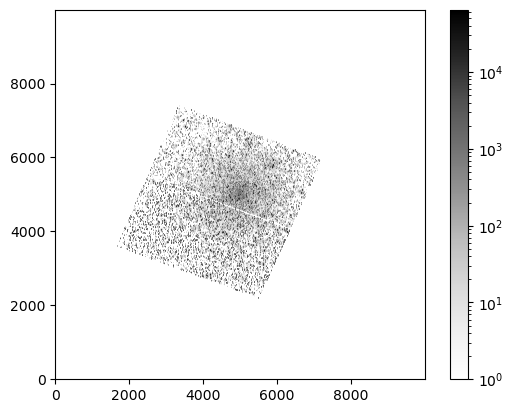

In [20]:
# Greys 컬러맵의 f336w 이미지 
plt.figure()
plt.imshow(image_data_f336w, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

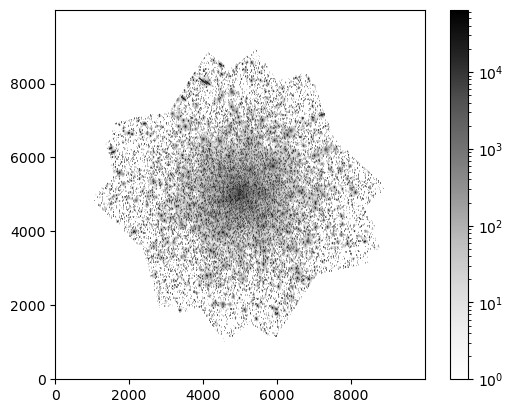

In [21]:
# Greys 컬러맵의 f475w 이미지 
plt.figure()
plt.imshow(image_data_f435w, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

**(참고)**

- 데이터의 작은 부분에 집중하기 위해서는 이미지에서 x와 y의 범위를 선택하여 특정 영역에 포커싱해서 fits 이미지를 살펴봄

- 전체 dimension을 확인하기 위해 info() 함수나 .shape을 사용 

In [22]:
# FITS 데이터를 RGB 이미지로 변환합니다.
# 이 예제에서는 파장1을 빨강(R), 파장2를 녹색(G), 파장3을 파랑(B)으로 사용합니다.
rgb_image = np.dstack((image_data_f275w, image_data_f336w, image_data_f435w))
rgb_image.shape

(10000, 10000, 3)

In [23]:
from PIL import Image

# RGB 이미지를 PIL 이미지로 변환
pil_image = Image.fromarray((rgb_image * 255).astype(np.uint8))

# save 함수 이용 이미지 저장
pil_image.save('plot/ngc6752_PIL_Image_rgb.jpg')

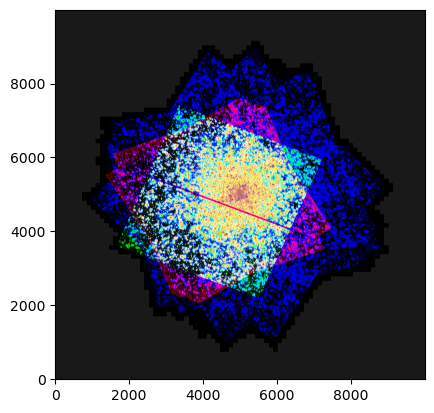

In [24]:
plt.imshow(pil_image, origin = 'lower')
plt.show()

In [25]:
type(image_data_f275w)

numpy.ndarray

## 1.3 lupton RGB 



<img src="./image/stretching.png" width="400" height="400"/>

asinh stretching(명암 대비) 방법을 사용하는 make_lupton_rgb 함수를 활용하여 시각화

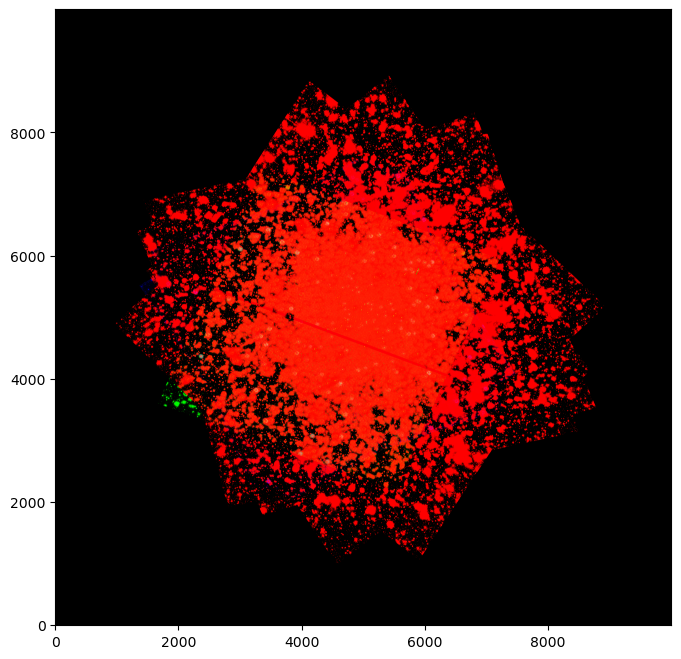

In [26]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

b = image_data_f275w.copy()
g = image_data_f336w.copy()
r = image_data_f435w.copy()

plt.figure(figsize = (8, 8))
rgb_default = make_lupton_rgb(r, g, b, filename="plot/ngc6752_lupton_rgb_basic.png",)
plt.imshow(rgb_default, origin='lower')

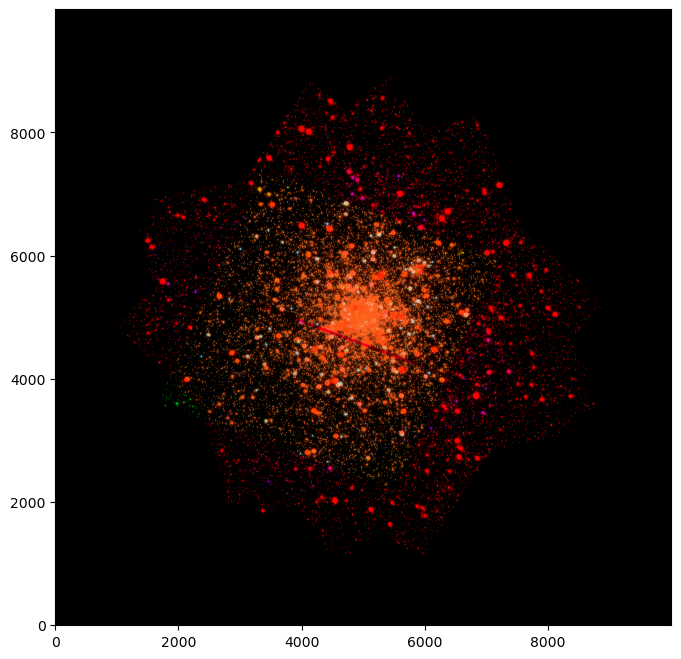

In [101]:
# stretch와 Q값 조절 #1

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

b = image_data_f275w.copy()
g = image_data_f336w.copy()
r = image_data_f435w.copy()

plt.figure(figsize = (8, 8))
rgb_default = make_lupton_rgb(r*0.3, g*1.0, b*1.8, stretch = 100, Q = 0.01, filename="plot/ngc6752_lupton_rgb_tune_1.png")
plt.imshow(rgb_default, origin='lower')

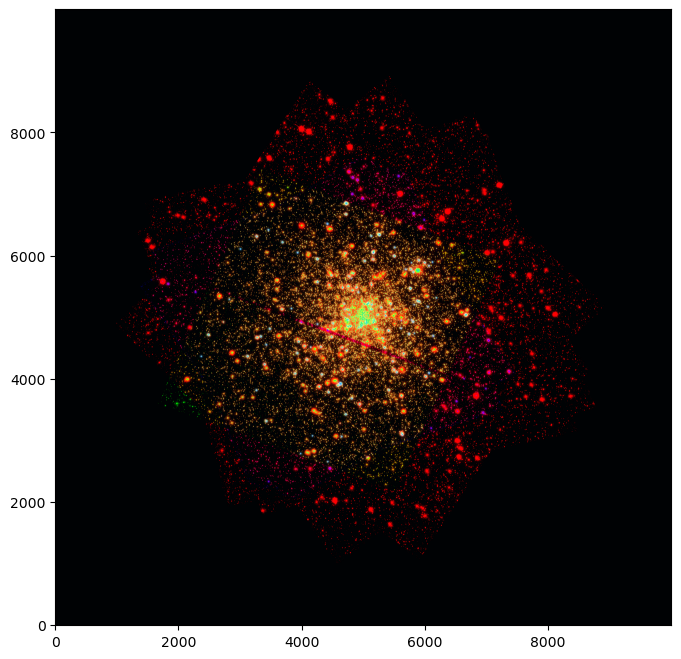

In [102]:
# stretch와 Q값 조절 # 2

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

# np.where절을 이용한 imputation 
max_f275w = np.max(image_data_f275w)
max_f336w = np.max(image_data_f336w)
max_f435w = np.max(image_data_f435w)

imputed_data2_f275w = np.where(image_data_f275w < 1, 1, image_data_f275w)
imputed_data2_f336w = np.where(image_data_f336w < 1, 1, image_data_f336w)
imputed_data2_f435w = np.where(image_data_f435w < 1, 1, image_data_f435w)


b = imputed_data2_f275w.copy()
g = imputed_data2_f336w.copy()
r = imputed_data2_f435w.copy()

t_r = 500
r[r > t_r] = t_r

t_g = 1000
g[g > t_g] = t_g

t_b = 1000
b[b > t_b] = t_b

rgb_default = make_lupton_rgb(r*0.3, g*1.0, b*1.8, stretch = 100, Q = 0.01, filename="plot/ngc6752_lupton_rgb_tune_2.png")
plt.figure(figsize= (8, 8))
plt.imshow(rgb_default, origin='lower')

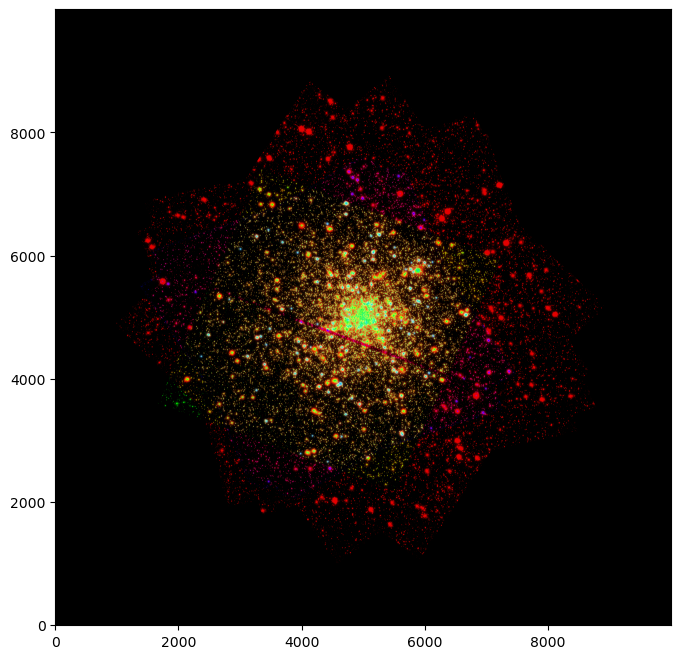

In [103]:
# stretch와 Q값 조절 # 2

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

# np.where절을 이용한 imputation 
max_f275w = np.max(image_data_f275w)
max_f336w = np.max(image_data_f336w)
max_f435w = np.max(image_data_f435w)

# truncation 삭제
# imputed_data2_f275w = np.where(image_data_f275w < 1, 1, image_data_f275w)
# imputed_data2_f336w = np.where(image_data_f336w < 1, 1, image_data_f336w)
# imputed_data2_f435w = np.where(image_data_f435w < 1, 1, image_data_f435w)


b = image_data_f275w.copy()
g = image_data_f336w.copy()
r = image_data_f435w.copy()


t_r = 300
r[r > t_r] = t_r

t_g = 2000
g[g > t_g] = t_g

t_b = 2000
b[b > t_b] = t_b

rgb_default = make_lupton_rgb(r*0.3, g*1.0, b*1.8, stretch = 100, Q = 0.01, filename="plot/ngc6752_lupton_rgb_tune_3.png")
plt.figure(figsize= (8, 8))
plt.imshow(rgb_default, origin='lower')

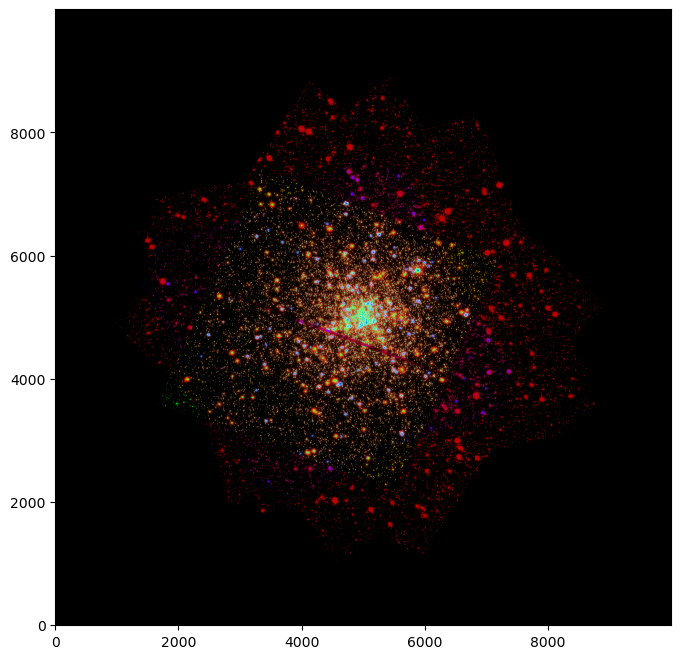

In [120]:
# stretch와 Q값 조절 # 3

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

# np.where절을 이용한 imputation 
max_f275w = np.max(image_data_f275w)
max_f336w = np.max(image_data_f336w)
max_f435w = np.max(image_data_f435w)

# truncation 삭제
# imputed_data2_f275w = np.where(image_data_f275w < 1, 1, image_data_f275w)
# imputed_data2_f336w = np.where(image_data_f336w < 1, 1, image_data_f336w)
# imputed_data2_f435w = np.where(image_data_f435w < 1, 1, image_data_f435w)


b = image_data_f275w.copy()
g = image_data_f336w.copy()
r = image_data_f435w.copy()


t_r = 300
r[r > t_r] = t_r

t_g = 700
g[g > t_g] = t_g

t_b = 2000
b[b > t_b] = t_b

rgb_default = make_lupton_rgb(r*0.3, g*0.8, b*2.5, stretch = 120, Q = 0.001, filename="plot/ngc6752_lupton_rgb_tune_4.png")
plt.figure(figsize= (8, 8))
plt.imshow(rgb_default, origin='lower')

----

HUGS 제공 RGB 합성 사진 (목표 사진/모범 답안)
---

<img src="image/ngc6752_RGB.png" width="800" height="800"/>

In [30]:
import os
os.getcwd()

'/Users/younghokim/astro/prj1_HUGS'

# 2. Photutils-detection

* Photutils: An Astropy Package for Photometry

> `Photutils`는 파이썬의 과학 이미지 처리 및 천체학 이미지 분석을 위한 패키지입니다. 'photutils'는 다양한 이미 처리 작업에 사용되며, 주로 천문학에서 물체의 위치, 밝기, 크기 및 형태를 추출하고 측정하는 데 사용됩니다. 다음은 photutils의 주요 기능과 몇 가지 예시입니다:
> 
> 1. **Aperture Photometry**: photutils를 사용하여 이미지에서 특정 물체 주위의 원 또는 타원 모양의 영역(아파처)을 정의하고 해당 아파처 내의 픽셀 값을 합산하여 물체의 밝기를 측정할 수 있습니다. 이것은 천체학적 객체의 등급 측정에 유용합니다.
> 
> 2. **PSF Photometry**: Point Spread Function (PSF) 기반의 천체 항목 검출 및 등급 측정을 수행합니다. 이것은 천체학 이미지에서 별과 같은 지점 소스를 분석하는 데 사용됩니다.
>
> 3. **Background Subtraction**: 이미지에서 백그라운드 레벨을 추정하고 이를 천체학적 객체의 밝기 측정에 사용할 수 있습니다.
>
> 4. **Detection and Segmentation**: 물체를 감지하고 분할(segment)하는 도구를 제공합니다. 물체의 위치를 식별하고 관심 물체를 분리하는 데 사용됩니다.
> 
> 5. **Photometry Algorithms**: 여러 가지 다양한 천체학적 등급 측정 알고리즘을 제공하며 사용자는 필요에 따라 선택할 수 있습니다.
> 
> photutils는 간단한 작업부터 복잡한 이미지 분석 작업까지 다양한 천체학적 이미지 처리 작업을 수행할 수 있는 강력한 도구를 제공합니다. 이 패키지는 과학 연구 및 천체학 연구에서 자주 사용되며, 파이썬으로 이미지 처리 및 분석을 수행하려는 연구자 및 과학자에게 유용합니다.

## 2.1 simga clipped stats

In [31]:
# 이상치가 제거된 범위 안에서 mean, median and standard deviation 찾기

from astropy.stats import sigma_clipped_stats
mean_f275w, median_f275w, std_f275w = sigma_clipped_stats(image_data_f275w, sigma = 3.0) # 기본값이 sigma = 3
mean_f336w, median_f336w, std_f336w = sigma_clipped_stats(image_data_f336w, sigma = 3.0)
mean_f435w, median_f435w, std_f435w = sigma_clipped_stats(image_data_f435w, sigma = 3.0)

sigma-clipping 

>    Perform sigma-clipping on the provided data.
>
>   The data will be iterated over, each time rejecting values that are
    less or more than a specified number of standard deviations from a
    center value.
>
>   Clipped (rejected) pixels are those where::
>
>        data < center - (sigma_lower * std)
>        data > center + (sigma_upper * std)
>
>    where::
>
>        center = cenfunc(data [, axis=])
>        std = stdfunc(data [, axis=])
>
>    Invalid data values (i.e., NaN or inf) are automatically clipped.
>
>    For an object-oriented interface to sigma clipping, see
>    :class:`SigmaClip`.
>

sigma_clipped_stats 함수는 주어진 데이터에서 이상치를 제외하고 계산된 평균, 중간값, 표준 편차를 반환합니다. 이를 사용하여 데이터의 중심 경향성과 분포를 이상치에 영향받지 않고 더 정확하게 평가할 수 있습니다.

$$\frac{{\sigma}_{old} - {\sigma}_{new}}{{\sigma}_{new}}$$

In [32]:
# print data
print(f'mean of image_data_f275w: {mean_f275w}')
print(f'median of image_data_f275w: {median_f275w}')
print(f'standard deviation of image_data_f275w: {std_f275w}')
print("\n")

# print data
print(f'mean of image_data_f336w: {mean_f336w}')
print(f'median of image_data_f336w: {median_f336w}')
print(f'standard deviation of image_data_f336w: {std_f336w}')
print("\n")

# print data
print(f'mean of image_data_f435w: {mean_f435w}')
print(f'median of image_data_f435w: {median_f435w}')
print(f'standard deviation of image_data_f435w: {std_f435w}')

mean of image_data_f275w: -13.888062477111816
median of image_data_f275w: -25.0
standard deviation of image_data_f275w: 12.67099380493164


mean of image_data_f336w: -14.246335983276367
median of image_data_f336w: -25.0
standard deviation of image_data_f336w: 12.761981010437012


mean of image_data_f435w: -15.287784576416016
median of image_data_f435w: -25.0
standard deviation of image_data_f435w: 14.6099853515625


In [33]:
# 원본 데이터와 비교 

print('Min_f275w:', np.min(image_data_f275w))
print('Max_f275w:', np.max(image_data_f275w))
print('Mean_f275w:', np.mean(image_data_f275w))
print("Median_f275w:", np.median(image_data_f275w))
print('Stdev_f275w:', np.std(image_data_f275w))
print('-'*50)

print('Min_f336w:', np.min(image_data_f336w))
print('Max_f336w:', np.max(image_data_f336w))
print('Mean_f336w:', np.mean(image_data_f336w))
print('Median_f336w:', np.median(image_data_f336w)) 
print('Stdev_f336w:', np.std(image_data_f336w))
print('-'*50)

print('Min_f435w:', np.min(image_data_f435w))
print('Max_f435w:', np.max(image_data_f435w))
print('Mean_f435w:', np.mean(image_data_f435w))
print('Median_f435w:', np.median(image_data_f435w))
print('Stdev_f435w:', np.std(image_data_f435w))

Min_f275w: -30.0
Max_f275w: 64750.0
Mean_f275w: -10.282332
Median_f275w: -25.0
Stdev_f275w: 305.4894
--------------------------------------------------
Min_f336w: -38.0
Max_f336w: 64750.0
Mean_f336w: 20.514856
Median_f336w: -25.0
Stdev_f336w: 1200.5875
--------------------------------------------------
Min_f435w: -80.0
Max_f435w: 64750.0
Mean_f435w: 128.22125
Median_f435w: -25.0
Stdev_f435w: 2262.5413


## 2.2 DAOStarFinder

In [34]:
'''Use DAOStarFinder to detect stars'''

from photutils.detection import DAOStarFinder

# 가우시안 커널을 이용하는 DAOStarFinder 이용, 소스 확인
# DAOStarFinder의 인스턴스를 사용하여 이미지에서 약 3픽셀의 FWHM을 가지며 배경보다 약 5 시그마 위에 피크가 있는 별을 찾도록 설정 
daofind_f275w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std_f275w)
daofind_f336w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std_f336w)
daofind_f435w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std_f435w)

# 백그라운드(배경)의 값을 빼준 2D-array에서 별을 찾도록 daofind 함수 적용
sources_f275w = daofind_f275w(image_data_f275w - median_f275w)
sources_f336w = daofind_f336w(image_data_f336w - median_f336w)
sources_f435w = daofind_f435w(image_data_f435w - median_f435w)

In [35]:
print(f'sources_f275w의 길이는 {len(sources_f275w)}')
print(f'sources_f336w의 길이는 {len(sources_f336w)}')
print(f'sources_f435w의 길이는 {len(sources_f435w)}')

sources_f275w의 길이는 14747
sources_f336w의 길이는 23093
sources_f435w의 길이는 61004


In [36]:
# format sources table 
for col in sources_f275w.colnames:
    if col not in ('id', 'npix'):
        sources_f275w[col].info.format = '%.2f'

# print table (make sure to use 'p-print' not just 'print')
sources_f275w.pprint(max_width = 76)
print("= ="*40)
#-----------------------------------------------------------#
for col in sources_f336w.colnames:
    if col not in ('id', 'npix'):
        sources_f336w[col].info.format = '%.2f'

# print table (make sure to use 'p-print' not just 'print')
sources_f336w.pprint(max_width = 76)
print("= ="*40)
#-----------------------------------------------------------#
for col in sources_f435w.colnames:
    if col not in ('id', 'npix'):
        sources_f435w[col].info.format = '%.2f'

# print table (make sure to use 'p-print' not just 'print')
sources_f435w.pprint(max_width = 76)
print("= ="*40)

  id  xcentroid ycentroid sharpness roundness1 ... sky    peak   flux  mag 
----- --------- --------- --------- ---------- ... ---- ------- ----- -----
    1   3903.28   2057.39      0.81       0.24 ... 0.00 1405.00 17.14 -3.09
    2   3899.88   2059.06      0.85       0.05 ... 0.00 2862.00 36.35 -3.90
    3   3883.06   2067.39      0.74      -0.25 ... 0.00  625.00  8.06 -2.27
    4   3943.46   2075.45      0.59      -0.36 ... 0.00  453.00  6.53 -2.04
    5   3936.03   2078.03      0.81       0.04 ... 0.00 1477.00 18.73 -3.18
    6   3869.05   2079.49      0.54      -0.14 ... 0.00  574.00  6.61 -2.05
    7   3843.68   2082.66      0.57      -0.37 ... 0.00  246.00  2.64 -1.06
  ...       ...       ...       ...        ... ...  ...     ...   ...   ...
14741   5048.00   7552.32      0.91       0.05 ... 0.00  363.00  4.01 -1.51
14742   4896.23   7555.03      0.63       0.21 ... 0.00 1301.00 16.07 -3.01
14743   4976.03   7554.99      0.67       0.21 ... 0.00  741.00  8.89 -2.37
14744   4925

### CircularAperture

#### f275w visualization

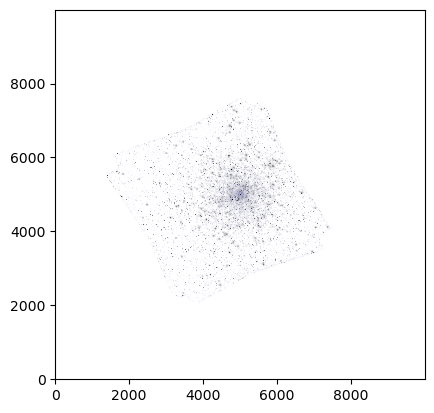

In [37]:
# matplotlib를 이용한 구상성단 시각화

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.aperture import CircularAperture

# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
positions_f275w = np.transpose((sources_f275w['xcentroid'], sources_f275w['ycentroid']))
apertures_f275w = CircularAperture(positions_f275w, r = 5.0)
plt.imshow(image_data_f275w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
apertures_f275w.plot(color = 'blue', lw = 0.1, alpha = 0.1);

#### f336w visualization

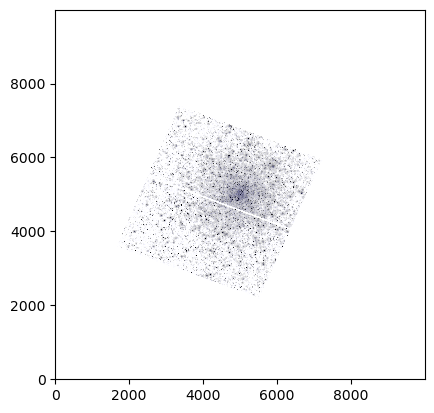

In [38]:
# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
positions_f336w = np.transpose((sources_f336w['xcentroid'], sources_f336w['ycentroid']))
apertures_f336w = CircularAperture(positions_f336w, r = 5.0)
plt.imshow(image_data_f336w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
apertures_f336w.plot(color = 'blue', lw = 0.1, alpha = 0.1);

#### f435w visualization

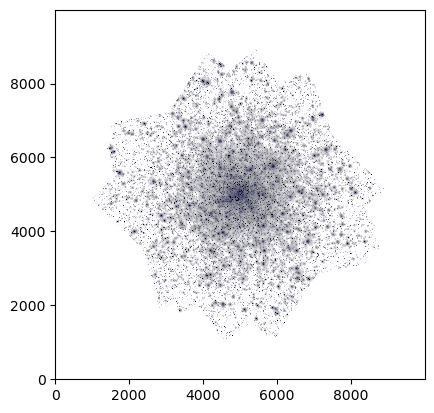

In [39]:
# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
positions_f435w = np.transpose((sources_f435w['xcentroid'], sources_f435w['ycentroid']))
apertures_f435w = CircularAperture(positions_f435w, r = 5.0)
plt.imshow(image_data_f435w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
apertures_f435w.plot(color = 'blue', lw = 0.1, alpha = 0.1);


> Supported values for interpolation are 
> 'bicubic', 'antialiased', 'spline36', 'bilinear', 'gaussian', 
> 'lanczos', 'blackman', 'nearest', 'kaiser', 'quadric', 'mitchell', 
> 'catrom', 'hanning', 'none', 'spline16', 
> 'bessel', 'hermite', 'hamming', 'sinc'


### Find peaks

- 피크 픽셀을 찾는 방법

    + 피크는 로컬 영역 내에서 임계값을 초과하는 최대값

        * 로컬 영역 내의 여러 픽셀이 동일한 강도를 갖는 경우 해당 픽셀의 좌표를 모두 반환
        * 그렇지 않을 경우, 로컬 영역당 피크 픽셀이 하나만 있음
        * 따라서 정의된 영역은 영역 내에 동일한 피크가 없는 한 피크 간 최소 간격을 효과적으로 부과할 수 있음
        * 또한 픽셀이므로 결과는 정수 좌표로 나오게 됨

#### f275w visualization

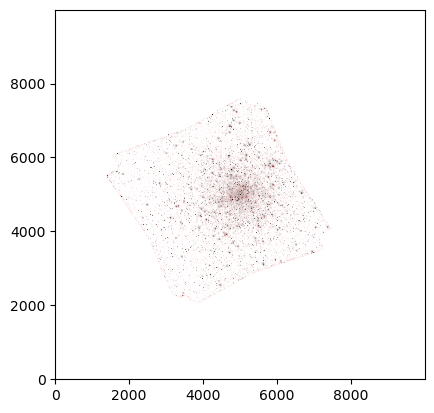

In [40]:
# 사용하는 함수 import 

from photutils.detection import find_peaks

# 이미지에서 배경보다 5 시그마 위쪽에 있고 
threshold_f275w = median_f275w + (5.0 * std_f275w)

# 5픽셀 이상 떨어져 있는 로컬 피크를 찾는 방법 
# box_size는 탐색하는 로컬 영역의 크기를 지정하는 인수
# box_size는 (찾으려는 폭 * 2 + 1(자기 자신))의 크기로 설정(ex: 5 pixels * 2 + 1 pixel = 11)
peaks_f275w = find_peaks(image_data_f275w - median_f275w, threshold_f275w, box_size = 11)
peaks_f275w['peak_value'].info.format = '%8g' # 출력 형식 자릿수 지정 

# 피크 포지션을 이용하여 원형 aperture를 생성하고 plt.imshow로 시각화
peak_positions_f275w = np.transpose((peaks_f275w['x_peak'], peaks_f275w['y_peak']))
peak_apertures_f275w = CircularAperture(peak_positions_f275w, r = 3.0)
plt.imshow(image_data_f275w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
peak_apertures_f275w.plot(color = 'red', lw = 0.3, alpha = 0.1);

#### f336w visualization

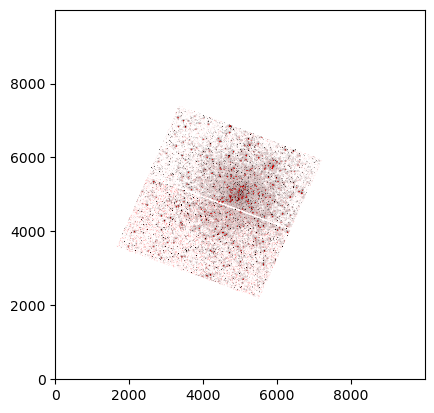

In [41]:
# 이미지에서 배경보다 5 시그마 위쪽에 있고 
threshold_f336w = median_f336w + (5.0 * std_f336w)

# 5픽셀 이상 떨어져 있는 로컬 피크를 찾는 방법 
# box_size는 탐색하는 로컬 영역의 크기를 지정하는 인수
# box_size는 (찾으려는 폭 * 2 + 1(자기 자신))의 크기로 설정(ex: 5 pixels * 2 + 1 pixel = 11)
peaks_f336w = find_peaks(image_data_f336w - median_f336w, threshold_f336w, box_size = 11)
peaks_f336w['peak_value'].info.format = '%8g' # 출력 형식 자릿수 지정 

# 피크 포지션을 이용하여 원형 aperture를 생성하고 plt.imshow로 시각화
peak_positions_f336w = np.transpose((peaks_f336w['x_peak'], peaks_f336w['y_peak']))
peak_apertures_f336w = CircularAperture(peak_positions_f336w, r = 3.0)
plt.imshow(image_data_f336w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
peak_apertures_f336w.plot(color = 'red', lw = 0.3, alpha = 0.1);

#### f435w visualization

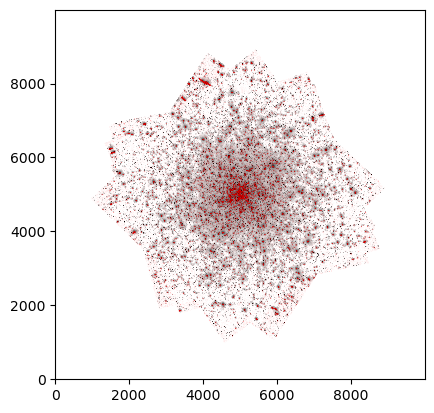

In [42]:
# 이미지에서 배경보다 5 시그마 위쪽에 있고 
threshold_f435w = median_f435w + (5.0 * std_f435w)

# 5픽셀 이상 떨어져 있는 로컬 피크를 찾는 방법 
# box_size는 탐색하는 로컬 영역의 크기를 지정하는 인수
# box_size는 (찾으려는 폭 * 2 + 1(자기 자신))의 크기로 설정(ex: 5 pixels * 2 + 1 pixel = 11)
peaks_f435w = find_peaks(image_data_f435w - median_f435w, threshold_f435w, box_size = 11)
peaks_f435w['peak_value'].info.format = '%8g' # 출력 형식 자릿수 지정 

# 피크 포지션을 이용하여 원형 aperture를 생성하고 plt.imshow로 시각화
peak_positions_f435w = np.transpose((peaks_f435w['x_peak'], peaks_f435w['y_peak']))
peak_apertures_f435w = CircularAperture(peak_positions_f435w, r = 3.0)
plt.imshow(image_data_f435w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
peak_apertures_f435w.plot(color = 'red', lw = 0.3, alpha = 0.1);

밝은 별들에 대한 마스킹 실시 후 시각화

## 2.3 백그라운드 산출 및 제거

1. 백그라운드를 제거하세요. photutils를 사용하여 백그라운드를 추정하고 제거할 수 있습니다. 예를 들어, MedianBackground 추정을 사용할 수 있습니다:

In [43]:
from photutils.background import Background2D
from photutils.background import MedianBackground

bkg_estimator = MedianBackground()
bkg_f275w = Background2D(image_data_f275w, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
new_f275w = image_data_f275w - bkg_f275w.background

bkg_f336w = Background2D(image_data_f336w, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
new_f336w = image_data_f275w - bkg_f336w.background

bkg_f435w = Background2D(image_data_f435w, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
new_f435w = image_data_f435w - bkg_f435w.background

위 코드에서 (50, 50)은 백그라운드를 추정하는 데 사용되는 격자 크기입니다. filter_size는 백그라운드를 평활화하기 위한 필터 크기입니다.

이미지를 그리세요. plt.imshow()를 사용하여 이미지를 그릴 수 있습니다:

In [44]:
print(np.quantile(image_data_f275w,np.arange(0.0, 1.1, 0.1)))
print(np.quantile(image_data_f336w,np.arange(0.0, 1.1, 0.1)))
print(np.quantile(image_data_f435w,np.arange(0.0, 1.1, 0.1)))

print(np.quantile(image_data_f275w,np.arange(0.90, 1.01, 0.01)))
print(np.quantile(image_data_f336w,np.arange(0.90, 1.01, 0.01)))
print(np.quantile(image_data_f435w,np.arange(0.90, 1.01, 0.01)))

[-3.000e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  6.475e+04]
[-3.800e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01
  0.000e+00  0.000e+00  0.000e+00  2.000e+00  6.475e+04]
[-8.000e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01
 -1.100e+01  0.000e+00  6.000e+00  4.800e+01  6.475e+04]
[0.000e+00 1.000e+00 1.000e+00 1.000e+00 2.000e+00 2.000e+00 3.000e+00
 4.000e+00 7.000e+00 1.900e+01 6.475e+04]
[2.000e+00 3.000e+00 4.000e+00 5.000e+00 7.000e+00 1.000e+01 1.400e+01
 2.200e+01 3.800e+01 9.400e+01 6.475e+04]
[4.800e+01 5.900e+01 7.200e+01 8.900e+01 1.140e+02 1.490e+02 2.040e+02
 3.040e+02 5.240e+02 1.330e+03 6.475e+04]


In [45]:
print(np.__version__)

1.26.2


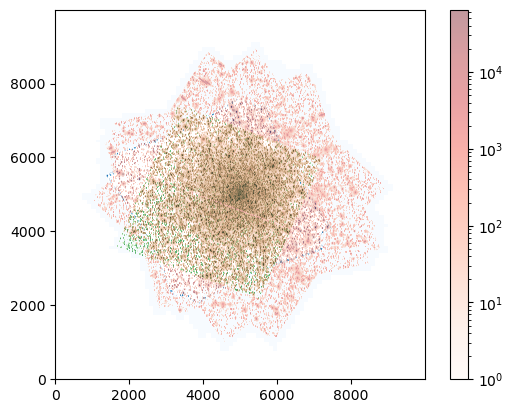

In [46]:
plt.figure()
plt.imshow(image_data_f275w, origin = 'lower', cmap = 'Blues', norm = LogNorm())
plt.imshow(image_data_f336w, origin = 'lower', cmap = 'Greens', norm = LogNorm(), alpha = 0.8)
plt.imshow(image_data_f435w, origin = 'lower', cmap = 'Reds', norm = LogNorm(), alpha = 0.4)
plt.colorbar()
plt.show()

# 3. 광도 측정

In [47]:
# variable "section1" contains our image data
# variable "positions" contains our positions 
# variable "apertures" contains our aperture data

'''find background values by drawing an anulus around each star'''

# import tools 
from photutils.aperture import CircularAnnulus
from photutils.aperture import CircularAperture
from photutils.aperture import ApertureStats
from photutils.aperture import aperture_photometry



# define annuluses
annulus_aperture_f275w = CircularAnnulus(positions_f275w, r_in = 10, r_out = 15)
annulus_aperture_f336w = CircularAnnulus(positions_f336w, r_in = 10, r_out = 15)
annulus_aperture_f435w = CircularAnnulus(positions_f435w, r_in = 10, r_out = 15)

### Partial Region Visualization

In [48]:
# define annuluses of partial region

# 이상치가 제거된 범위 안에서 mean, median and standard deviation 찾기

from astropy.stats import sigma_clipped_stats
pmean_f275w, pmedian_f275w, pstd_f275w = sigma_clipped_stats(image_data_f275w[4500:4600, 4500:4600], sigma = 3.0) # 기본값이 sigma = 3
pmean_f336w, pmedian_f336w, pstd_f336w = sigma_clipped_stats(image_data_f336w[4500:4600, 4500:4600], sigma = 3.0)
pmean_f435w, pmedian_f435w, pstd_f435w = sigma_clipped_stats(image_data_f435w[4500:4600, 4500:4600], sigma = 3.0)

# 가우시안 커널을 이용하는 DAOStarFinder 이용, 소스 확인
# DAOStarFinder의 인스턴스를 사용하여 이미지에서 약 3픽셀의 FWHM을 가지며 배경보다 약 5 시그마 위에 피크가 있는 별을 찾도록 설정 
pdaofind_f275w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*pstd_f275w)
pdaofind_f336w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*pstd_f336w)
pdaofind_f435w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*pstd_f435w)

# 백그라운드(배경)의 값을 빼준 2D-array에서 별을 찾도록 daofind 함수 적용
psources_f275w = daofind_f275w(image_data_f275w[4500:4600, 4500:4600] - pmedian_f275w)
psources_f336w = daofind_f336w(image_data_f336w[4500:4600, 4500:4600] - pmedian_f336w)
psources_f435w = daofind_f435w(image_data_f435w[4500:4600, 4500:4600] - pmedian_f435w)


# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
ppositions_f275w = np.transpose((psources_f275w['xcentroid'], psources_f275w['ycentroid']))
papertures_f275w = CircularAperture(ppositions_f275w, r = 5.0)
pannulus_aperture_f275w = CircularAnnulus(ppositions_f275w, r_in = 10, r_out = 15)


# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
ppositions_f336w = np.transpose((psources_f336w['xcentroid'], psources_f336w['ycentroid']))
papertures_f336w = CircularAperture(ppositions_f336w, r = 5.0)
pannulus_aperture_f336w = CircularAnnulus(ppositions_f336w, r_in = 10, r_out = 15)


# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
ppositions_f435w = np.transpose((psources_f435w['xcentroid'], psources_f435w['ycentroid']))
papertures_f435w = CircularAperture(ppositions_f435w, r = 5.0)
pannulus_aperture_f435w = CircularAnnulus(ppositions_f435w, r_in = 10, r_out = 15)

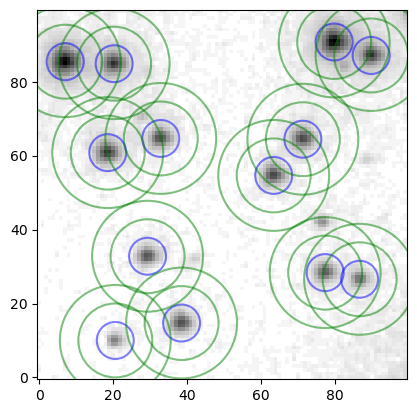

In [49]:
# plot annuluses
plt.figure()
plt.imshow(image_data_f275w[4500:4600, 4500:4600], cmap = 'Greys', norm = LogNorm(), origin = 'lower')
papertures_f275w.plot(color = 'blue', lw = 1.5, alpha = 0.5);
pannulus_aperture_f275w.plot(color = 'green', lw = 1.5, alpha = 0.5);
plt.show()

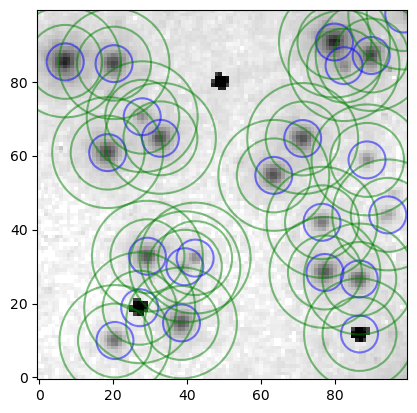

In [50]:
# plot annuluses
plt.figure()
plt.imshow(image_data_f336w[4500:4600, 4500:4600], cmap = 'Greys', norm = LogNorm(), origin = 'lower')
papertures_f336w.plot(color = 'blue', lw = 1.5, alpha = 0.5);
pannulus_aperture_f336w.plot(color = 'green', lw = 1.5, alpha = 0.5);
plt.show()

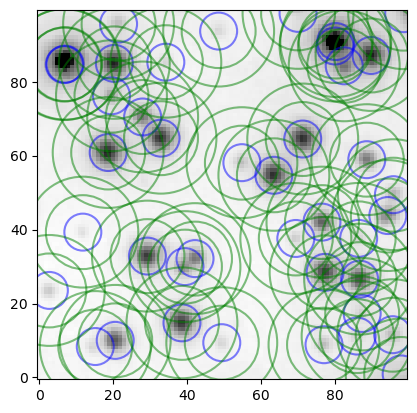

In [51]:
# plot annuluses
plt.figure()
plt.imshow(image_data_f435w[4500:4600, 4500:4600], cmap = 'Greys', norm = LogNorm(), origin = 'lower')
papertures_f435w.plot(color = 'blue', lw = 1.5, alpha = 0.5);
pannulus_aperture_f435w.plot(color = 'green', lw = 1.5, alpha = 0.5);
plt.show()

maximum value of R-channel: 64750.0
maximum value of G-channel: 64750.0
maximum value of B-channel: 3252.0


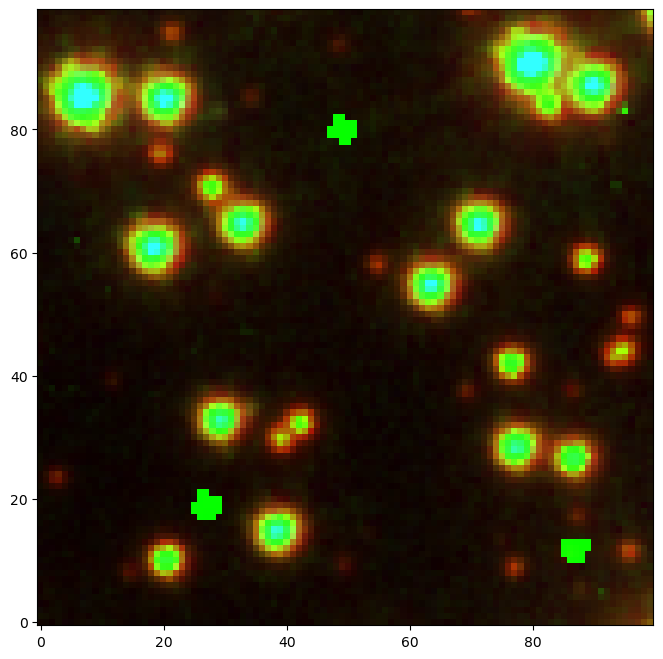

In [118]:
# stretch와 Q값 조절 # 2

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

# np.where절을 이용한 imputation 

b = image_data_f275w[4500:4600, 4500:4600].copy()
g = image_data_f336w[4500:4600, 4500:4600].copy()
r = image_data_f435w[4500:4600, 4500:4600].copy()

print(f"maximum value of R-channel: {r.max()}")

print(f"maximum value of G-channel: {g.max()}")

print(f"maximum value of B-channel: {b.max()}")

t_r = 500
r[r > t_r] = t_r

t_g = 500
g[g > t_g] = t_g

t_b = 500
b[b > t_b] = t_b

lupton_rgb1 = make_lupton_rgb(r*0.2, g*1.0, b*1.0, stretch = 150, Q = 0.001, filename="plot/ngc6752_lupton_rgb_partial_1.png")
plt.figure(figsize= (8, 8))
plt.imshow(lupton_rgb1, origin='lower')

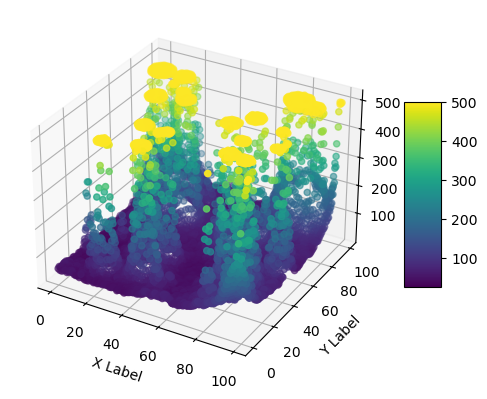

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# truncation을 실시한 R-channel(f435w) 데이터에 대한 3차원 시각화
matrix = r.copy()

# 행렬의 x, y 좌표를 생성합니다. (여기서는 인덱스를 사용합니다)
x = np.arange(matrix.shape[0])
y = np.arange(matrix.shape[1])
x, y = np.meshgrid(x, y)

# 새로운 그래프 창을 생성합니다.
fig = plt.figure()

# 3D 축을 추가합니다.
ax = fig.add_subplot(111, projection='3d')

# 행렬의 값을 z 좌표로 사용하여 3D 산점도를 그립니다.
z = matrix.flatten()
scatter = ax.scatter(x.flatten(), y.flatten(), z, c = z, cmap = 'viridis')
fig.colorbar(scatter, shrink=0.5, aspect=5)

# 레이블을 추가합니다.
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 그래프를 표시합니다.
plt.show()


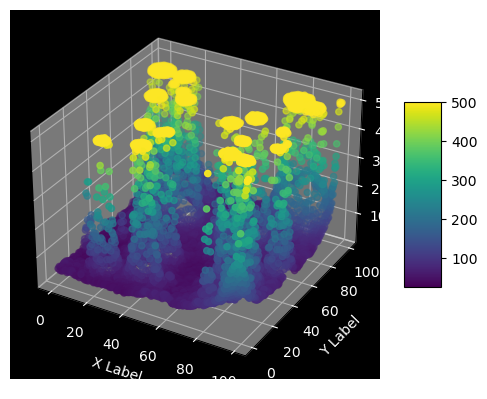

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# truncation을 실시한 R-channel(f435w) 데이터에 대한 3차원 시각화
matrix = r.copy()

# 행렬의 x, y 좌표를 생성합니다. (여기서는 인덱스를 사용합니다)
x = np.arange(matrix.shape[0])
y = np.arange(matrix.shape[1])
x, y = np.meshgrid(x, y)

# 새로운 그래프 창을 생성합니다.
fig = plt.figure()

# 3D 축을 추가합니다.
ax = fig.add_subplot(111, projection='3d')

# 배경색을 검은색으로 설정합니다.
ax.set_facecolor('black')

# 행렬의 값을 z 좌표로 사용하여 3D 산점도를 그립니다.
z = matrix.flatten()
scatter = ax.scatter(x.flatten(), y.flatten(), z, c = z, cmap = 'viridis')
fig.colorbar(scatter, shrink=0.5, aspect=5)

# 레이블을 추가합니다.
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 레이블을 추가하고 색상을 흰색으로 설정합니다.
ax.set_xlabel('X Label', color='white')
ax.set_ylabel('Y Label', color='white')
ax.set_zlabel('Z Label', color='white')

# 눈금의 색상을 변경합니다.
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')


# 그래프를 표시합니다.
plt.show()



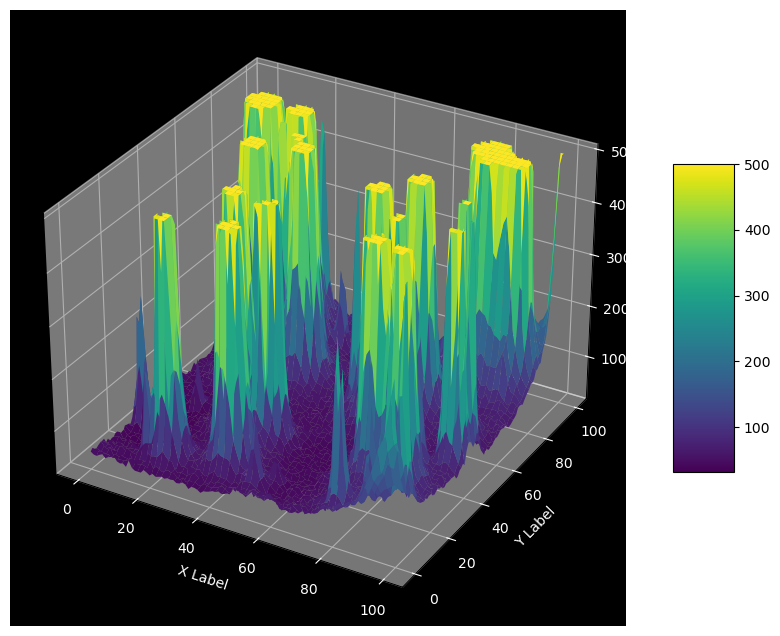

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# truncation을 실시한 R-channel(f435w) 데이터에 대한 3차원 시각화
matrix = r.copy()

# 행렬의 x, y 좌표를 생성합니다. (여기서는 인덱스를 사용합니다)
x = np.arange(matrix.shape[0])
y = np.arange(matrix.shape[1])
x, y = np.meshgrid(x, y)

# 새로운 그래프 창을 생성합니다.
fig = plt.figure(figsize=(12, 8))

# 3D 축을 추가합니다.
ax = fig.add_subplot(111, projection='3d')

# 배경색을 검은색으로 설정합니다.
ax.set_facecolor('black')

# 표면 그래프 그리기
surf = ax.plot_surface(x, y, matrix, cmap='viridis')

# 컬러 바를 추가합니다.
fig.colorbar(surf, shrink=0.5, aspect=5)

# 레이블을 추가합니다.
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 레이블을 추가하고 색상을 흰색으로 설정합니다.
ax.set_xlabel('X Label', color='white')
ax.set_ylabel('Y Label', color='white')
ax.set_zlabel('Z Label', color='white')

# 눈금의 색상을 변경합니다.
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')


# 그래프를 표시합니다.
plt.show()



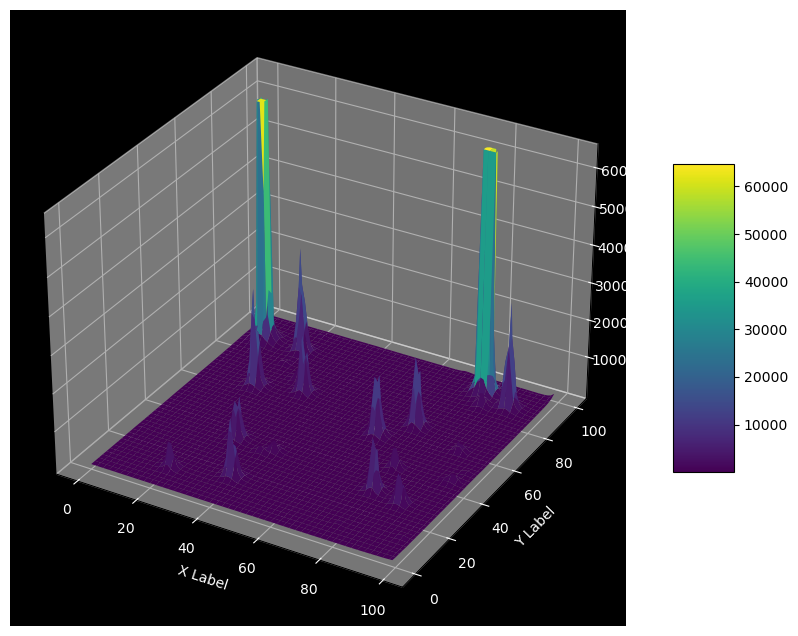

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 임의의 2차원 행렬을 생성합니다.
matrix = image_data_f435w[4500:4600, 4500:4600].copy()

# 행렬의 x, y 좌표를 생성합니다. (여기서는 인덱스를 사용합니다)
x = np.arange(matrix.shape[0])
y = np.arange(matrix.shape[1])
x, y = np.meshgrid(x, y)

# 새로운 그래프 창을 생성합니다.
fig = plt.figure(figsize=(12, 8))

# 3D 축을 추가합니다.
ax = fig.add_subplot(111, projection='3d')

# 배경색을 검은색으로 설정합니다.
ax.set_facecolor('black')

# 표면 그래프 그리기
surf = ax.plot_surface(x, y, matrix, cmap='viridis')

# 컬러 바를 추가합니다.
fig.colorbar(surf, shrink=0.5, aspect=5)

# 레이블을 추가합니다.
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 레이블을 추가하고 색상을 흰색으로 설정합니다.
ax.set_xlabel('X Label', color='white')
ax.set_ylabel('Y Label', color='white')
ax.set_zlabel('Z Label', color='white')

# 눈금의 색상을 변경합니다.
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')


# 그래프를 표시합니다.
plt.show()



In [57]:
matrix.max()

64750.0

### define background and perform aperture photometry

In [58]:
# define background_f275w
aperstats_f275w = ApertureStats(image_data_f275w, annulus_aperture_f275w)
bkg_mean_f275w = aperstats_f275w.mean
aperture_area_f275w = apertures_f275w.area_overlap(image_data_f275w)
total_bkg_f275w = bkg_mean_f275w * aperture_area_f275w

# define background_336w
aperstats_f336w = ApertureStats(image_data_f336w, annulus_aperture_f336w)
bkg_mean_f336w = aperstats_f336w.mean
aperture_area_f336w = apertures_f336w.area_overlap(image_data_f336w)
total_bkg_f336w = bkg_mean_f336w * aperture_area_f336w

# define background_435w
aperstats_f435w = ApertureStats(image_data_f435w, annulus_aperture_f435w)
bkg_mean_f435w = aperstats_f435w.mean
aperture_area_f435w = apertures_f435w.area_overlap(image_data_f435w)
total_bkg_f435w = bkg_mean_f435w * aperture_area_f435w

# perform aperture photometry
star_data_f275w = aperture_photometry(image_data_f275w, apertures_f275w)
star_data_f336w = aperture_photometry(image_data_f336w, apertures_f336w)
star_data_f435w = aperture_photometry(image_data_f435w, apertures_f435w)


# add backgrounds to table
star_data_f275w['total_bkg'] = total_bkg_f275w
star_data_f336w['total_bkg'] = total_bkg_f336w
star_data_f435w['total_bkg'] = total_bkg_f435w



In [59]:
# format and print data
for col in star_data_f275w.colnames:
    star_data_f275w[col].info.format = '%.8g'

star_data_f275w.pprint()

  id   xcenter   ycenter  aperture_sum total_bkg 
         pix       pix                           
----- --------- --------- ------------ ----------
    1 3903.2841 2057.3852    10965.654 -0.9992343
    2 3899.8845 2059.0603    10677.215 -3.7874531
    3 3883.0615 2067.3928    2125.0689  100.23368
    4 3943.4624 2075.4517    1891.1716 0.19783329
    5 3936.0267 2078.0264    4179.6335  21.638521
    6 3869.0478 2079.4912    5562.8479  39.774663
  ...       ...       ...          ...        ...
14741 5047.9974 7552.3161     871.5011  81.529911
14742 4896.2273 7555.0346    10192.356  879.20403
14743 4976.0256 7554.9939     5082.206 -5.2092735
14744 4925.7341  7573.051    1163.1795   119.4208
14745 4979.8891 7574.2493    1186.7167 -19.734624
14746 5005.4344 7576.8895    7940.5229 -3.0130364
14747  4966.564 7594.3987    719.15995 -23.860197
Length = 14747 rows


In [60]:
# format and print data
for col in star_data_f336w.colnames:
    star_data_f336w[col].info.format = '%.8g'

star_data_f336w.pprint()

  id   xcenter   ycenter  aperture_sum total_bkg 
         pix       pix                           
----- --------- --------- ------------ ----------
    1 5509.2577 2196.0477    21028.874  2498.7745
    2 5516.8069 2250.1826    728108.66 -144.08959
    3 5490.5331 2256.7778    719576.99  -131.7635
    4 5343.4124 2272.7447    5916.1108  317.35682
    5 5404.2481  2275.522    7317.0388  214.34411
    6 5373.4913  2278.136    185147.06  5175.9753
  ...       ...       ...          ...        ...
23087  3468.958 7324.0747    1077.4864  26414.096
23088 3501.9048 7324.1693    8296.1106 -207.24119
23089 3483.6294 7326.7544    323123.72 -69.416504
23090 3352.4887 7354.4622    26342.669  37.983992
23091 3432.7092 7371.7854    279354.15 -131.89893
23092 3354.0266 7382.6841    93343.759  309.96248
23093 3368.4938 7388.2671    972.80265  6039.4136
Length = 23093 rows


In [61]:
# format and print data
for col in star_data_f435w.colnames:
    star_data_f435w[col].info.format = '%.8g'

star_data_f435w.pprint()

  id   xcenter   ycenter  aperture_sum total_bkg 
         pix       pix                           
----- --------- --------- ------------ ----------
    1 4598.1572 1009.3955    4493.1623 -648.15384
    2 4567.7359  1010.075    3690.2954 -1053.0747
    3  4585.182 1013.9239     2754.417  762.35715
    4  4555.559  1016.641   -617.97081    47.7634
    5 4576.7692 1026.6582    10871.501 -963.66156
    6 4640.2208 1029.1407    3427.4983 -842.29946
  ...       ...       ...          ...        ...
60998 5429.0905 8867.3633    2294.1609  74905.257
60999 5382.6776 8867.7403     1696.677 -1161.1103
61000 5441.3066 8872.0256    434804.11  1360.3576
61001 5413.0026 8891.4726   -170.08879  35.019042
61002 5388.8088 8894.4144   -197.17324 -566.89637
61003 5429.2681 8900.8256    133842.69  214.43568
61004 5414.1559  8912.896    1652.9402  491.42343
Length = 61004 rows


In [62]:
'''
find zeropoint from catalogue based on filter and instrument.
Install acs tools by typing the following command into the terminal:

$pip install acstools

ACStools: Python tools for Hubble Space Telescope Advanced Camera for Surveys data

The ACStools package contains Python tools to work with data 
from the Hubble Space Telescope (HST) Advanced Camera for Surveys (ACS). 
The package has several calibration utilities and a zeropoints calculator, 
can detect satellite trails, and offers destriping, polarization, and photometric tools.
'''
from acstools import acszpt

In [63]:
# header_f275w 정보 확인
print("==================f275w=================")
print(f"DATE in header: {header_f275w['DATE-OBS']}")
print(f"INSTRUMENT in header: {header_f275w['INSTRUME']}")
print(f"FILTER in header: {header_f275w['FILTER']}")
print("-"*40)

# header_f336w 정보 확인
print("==================f336w=================")
print(f"DATE in header: {header_f336w['DATE-OBS']}")
print(f"INSTRUMENT in header: {header_f336w['INSTRUME']}")
print(f"FILTER in header: {header_f336w['FILTER']}")
print("-"*50)

# header_f435w 정보 확인
print("==================f435w=================")
print(f"DATE in header: {header_f435w['DATE-OBS']}")
print(f"INSTRUMENT in header: {header_f435w['INSTRUME']}")
print(f"FILTER in header: {header_f435w['FILTER']}")
print("-"*50)

==================f275w=================
DATE in header: 2011-03-23T17:05:01
INSTRUMENT in header: WFC3-UVIS
FILTER in header: F275W
----------------------------------------
==================f336w=================
DATE in header: 2010-05-05T20:36:46
INSTRUMENT in header: WFC3-UVIS
FILTER in header: F336W
--------------------------------------------------
==================f435w=================
DATE in header: 2011-05-19T16:32:32
INSTRUMENT in header: ACS-WFC
FILTER in header: F435W
--------------------------------------------------


In [64]:
# find date in header 
date_f275w = '2012-10-25' # 형식 '2006-03-10'
instrument_f275w = 'WFC'  # 'WFC'
filter_f275w = 'F275W'    # 'F814W'

# find date in header 
date_f336w = '2012-10-25' # 형식 '2006-03-10'
instrument_f336w = 'WFC'  # 'WFC'
filter_f336w = 'F336W'    # 'F814W'

# find date in header 
date_f435w = '2012-10-25' # 형식 '2006-03-10'
instrument_f435w = 'WFC'  # 'WFC'
filter_f435w = 'f435w'    # 'F814W'

In [65]:
# fetch zeropoint from catalogue
q_f435w = acszpt.Query(date = date_f435w, detector = instrument_f435w)
zpt_table_f435w = q_f435w.fetch()

q_filter_f435w = acszpt.Query(date = date_f435w, detector = instrument_f435w, filt = filter_f435w)
filter_zpt_f435w = q_filter_f435w.fetch()

# print data
print(filter_zpt_f435w)

Filter PHOTLAM             PHOTFLAM            STmag  VEGAmag  ABmag 
       Angstrom erg / (Angstrom electron cm2) mag(ST)   mag   mag(AB)
------ -------- ----------------------------- ------- ------- -------
 F435W   4329.9                    3.1795e-19  25.144  25.769  25.654


In [66]:
# fetch zeropoint from catalogue
q_f336w = acszpt.Query(date = date_f336w, detector = instrument_f336w)
zpt_table_f336w = q_f336w.fetch()

q_filter_f336w = acszpt.Query(date = date_f336w, detector = instrument_f336w, filt = filter_f336w)
filter_zpt_f336w = q_filter_f336w.fetch()

# print data
print(filter_zpt_f336w)

ERROR:acszpt.Query:F336W is not a valid filter for WFC
Please choose one of the following:
F435W
F475W
F502N
F550M
F555W
F606W
F625W
F658N
F660N
F775W
F814W
F850LP
F892N
-------------------------------------------------------------------------------


None


acstools 패키지에서 정보 조회가 어려우므로 

다음의 참고 문헌의 zeropoint 사용 

<img src="./image/zeropoint.png" width="600" height="600"/>


In [67]:
# use ABmag from filter_zpt
zeropoint_f275w = 24.14
zeropoint_f336w = 24.64

# find exposure time in header
extime_f275w = header_f275w['EXPTIME']
extime_f336w = header_f336w['EXPTIME']

print(zeropoint_f275w)
print(zeropoint_f336w)
print(extime_f275w)
print(extime_f336w)

24.14
24.64
4428.0
1000.0


In [68]:
star_data_f275w_df = star_data_f275w.to_pandas()
star_data_f336w_df = star_data_f336w.to_pandas()

In [69]:
star_data_f275w_df.head()

id      xcenter      ycenter  aperture_sum   total_bkg
0   1  3903.284051  2057.385240  10965.653668   -0.999234
1   2  3899.884467  2059.060264  10677.215111   -3.787453
2   3  3883.061516  2067.392836   2125.068876  100.233679
3   4  3943.462359  2075.451684   1891.171567    0.197833
4   5  3936.026684  2078.026436   4179.633472   21.638521

In [70]:
star_data_f336w_df.head()

id      xcenter      ycenter   aperture_sum    total_bkg
0   1  5509.257678  2196.047694   21028.874005  2498.774464
1   2  5516.806948  2250.182623  728108.657023  -144.089587
2   3  5490.533083  2256.777821  719576.990873  -131.763499
3   4  5343.412383  2272.744723    5916.110796   317.356815
4   5  5404.248132  2275.522015    7317.038813   214.344106

## Magnitude 계산

**MAGNITUDE = ZEROPOINT - 2.5*log_10{(APERTURE_SUM - TOTAL_BKG)/EXTIME}**

$$ Magnitude = Zeropoint -2.5*log_{10}{((Aperture\;sum - total\;background)/exposure\;time)}$$

- f275w 사진과 f336w 사진에 찍힌 별들의 강도에 따라 식별되지 않을 수도 있으며, star find 알고리즘(daofind)에 따라 정확한 위치 값은 상이할 수 있으므로
- float 형태의 값은 버림하고 정수로 일치
- 그 후 inner join 실시

In [71]:
star_data_f275w_df['diff_f275w'] = star_data_f275w_df['aperture_sum'] - star_data_f275w_df['total_bkg']
star_data_f275w_df['mag_f275w'] = zeropoint_f275w - (2.5*np.log10(abs(star_data_f275w_df['diff_f275w'])/extime_f275w))
star_data_f275w_df.head()

id      xcenter      ycenter  aperture_sum   total_bkg    diff_f275w  \
0   1  3903.284051  2057.385240  10965.653668   -0.999234  10966.652903   
1   2  3899.884467  2059.060264  10677.215111   -3.787453  10681.002564   
2   3  3883.061516  2067.392836   2125.068876  100.233679   2024.835197   
3   4  3943.462359  2075.451684   1891.171567    0.197833   1890.973733   
4   5  3936.026684  2078.026436   4179.633472   21.638521   4157.994952   

   mag_f275w  
0  23.155334  
1  23.183989  
2  24.989545  
3  25.063805  
4  24.208309

In [72]:
star_data_f336w_df['diff_f336w'] = star_data_f336w_df['aperture_sum'] - star_data_f336w_df['total_bkg']
star_data_f336w_df['mag_f336w'] = zeropoint_f336w - (2.5*np.log10(abs(star_data_f336w_df['diff_f336w'])/extime_f336w))
star_data_f336w_df.head()

id      xcenter      ycenter   aperture_sum    total_bkg     diff_f336w  \
0   1  5509.257678  2196.047694   21028.874005  2498.774464   18530.099541   
1   2  5516.806948  2250.182623  728108.657023  -144.089587  728252.746610   
2   3  5490.533083  2256.777821  719576.990873  -131.763499  719708.754372   
3   4  5343.412383  2272.744723    5916.110796   317.356815    5598.753980   
4   5  5404.248132  2275.522015    7317.038813   214.344106    7102.694707   

   mag_f336w  
0  21.470306  
1  17.484295  
2  17.497108  
3  22.769772  
4  22.511442

In [73]:
# Join을 위해 버림 실시

star_data_f275w_df['xcenter'] = np.floor(star_data_f275w_df['xcenter']).astype(int);
star_data_f275w_df['ycenter'] = np.floor(star_data_f275w_df['ycenter']).astype(int);

star_data_f336w_df['xcenter'] = np.floor(star_data_f336w_df['xcenter']).astype(int);
star_data_f336w_df['ycenter'] = np.floor(star_data_f336w_df['ycenter']).astype(int);

In [74]:
star_data_f275w_df.head()

id  xcenter  ycenter  aperture_sum   total_bkg    diff_f275w  mag_f275w
0   1     3903     2057  10965.653668   -0.999234  10966.652903  23.155334
1   2     3899     2059  10677.215111   -3.787453  10681.002564  23.183989
2   3     3883     2067   2125.068876  100.233679   2024.835197  24.989545
3   4     3943     2075   1891.171567    0.197833   1890.973733  25.063805
4   5     3936     2078   4179.633472   21.638521   4157.994952  24.208309

In [75]:
star_data_f336w_df.head()

id  xcenter  ycenter   aperture_sum    total_bkg     diff_f336w  mag_f336w
0   1     5509     2196   21028.874005  2498.774464   18530.099541  21.470306
1   2     5516     2250  728108.657023  -144.089587  728252.746610  17.484295
2   3     5490     2256  719576.990873  -131.763499  719708.754372  17.497108
3   4     5343     2272    5916.110796   317.356815    5598.753980  22.769772
4   5     5404     2275    7317.038813   214.344106    7102.694707  22.511442

In [76]:
ngc6752_merge_df = pd.merge(star_data_f275w_df, star_data_f336w_df, how = 'inner', on = ['xcenter', 'ycenter'])

In [77]:
ngc6752_merge_df.head()

id_x  xcenter  ycenter  aperture_sum_x  total_bkg_x   diff_f275w  \
0   182     4667     2504     8282.140220   156.880293  8125.259926   
1   214     4645     2549     6473.797514    32.221463  6441.576051   
2   223     4584     2567     2186.369390    24.581164  2161.788226   
3   224     4545     2570     2126.567090    17.831744  2108.735346   
4   233     4826     2581     5421.770774    31.775651  5389.995123   

   mag_f275w  id_y  aperture_sum_y  total_bkg_y    diff_f336w  mag_f336w  
0  23.480926    99    42708.231323    58.103436  42650.127887  20.565199  
1  23.733039   135    47668.720833    90.730475  47577.990358  20.446485  
2  24.918486   152    16253.814065   -11.821044  16265.635109  21.611822  
3  24.945464   155    15566.346342    30.409006  15535.937336  21.661656  
4  23.926548   164    18555.307174    20.983920  18534.323253  21.470058

In [78]:
print(ngc6752_merge_df.shape)
print(ngc6752_merge_df.columns)

(10676, 12)
Index(['id_x', 'xcenter', 'ycenter', 'aperture_sum_x', 'total_bkg_x',
       'diff_f275w', 'mag_f275w', 'id_y', 'aperture_sum_y', 'total_bkg_y',
       'diff_f336w', 'mag_f336w'],
      dtype='object')


In [79]:
ngc6752_merge_df['diff_mag'] = ngc6752_merge_df['mag_f275w'] - ngc6752_merge_df['mag_f336w']

### CMD 그리기

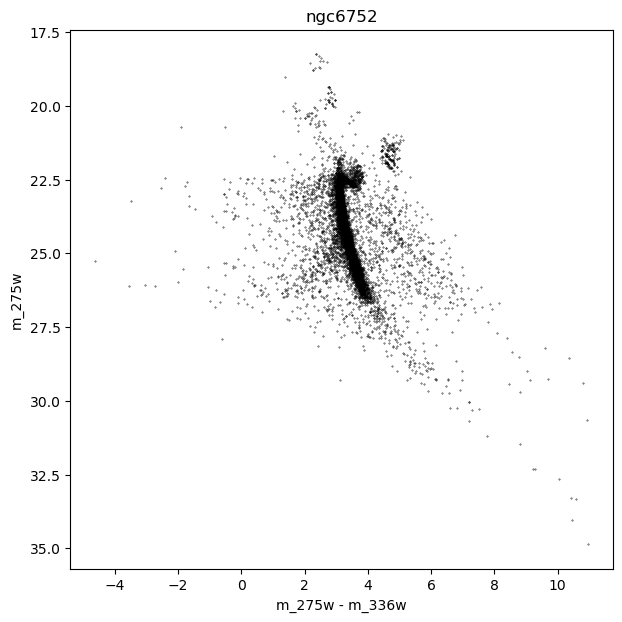

In [80]:
plt.figure(figsize = (7, 7))
plt.scatter(x = ngc6752_merge_df['diff_mag'],
            y = ngc6752_merge_df['mag_f275w'],
            s = 0.1,
            c = 'black')
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("ngc6752")
plt.gca().invert_yaxis()
plt.show()

### 백그라운드 제외, CMD 그리기

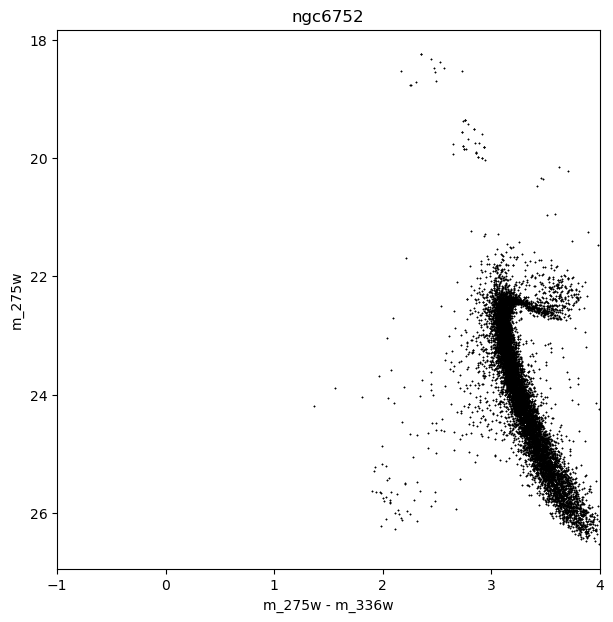

In [81]:
# total background의 값을 0 으로 가정

star_data_f275w_df['assumed_f275w'] = star_data_f275w_df['aperture_sum']  # total background = 0 
star_data_f275w_df['assumed_mag_f275w'] = zeropoint_f275w - (2.5*np.log10(abs(star_data_f275w_df['assumed_f275w'])/extime_f275w))

star_data_f336w_df['assumed_f336w'] = star_data_f336w_df['aperture_sum'] # total background = 0 
star_data_f336w_df['assumed_mag_f336w'] = zeropoint_f336w - (2.5*np.log10(abs(star_data_f336w_df['assumed_f336w'])/extime_f336w))

ngc0104_merge_df2 = pd.merge(star_data_f275w_df, star_data_f336w_df, how = 'inner', on = ['xcenter', 'ycenter'])

ngc0104_merge_df2['assumed_diff_mag'] = ngc0104_merge_df2['assumed_mag_f275w'] - ngc0104_merge_df2['assumed_mag_f336w']


plt.figure(figsize = (7, 7))
plt.scatter(x = ngc0104_merge_df2['assumed_diff_mag'],
            y = ngc0104_merge_df2['assumed_mag_f275w'],
            s = 0.1,
            color = 'black',
            marker = '*')
# plt.ylim(15.5, 24.5)
plt.xlim(-1, 4)
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("ngc6752")
plt.gca().invert_yaxis()
plt.show()

### ngc6752 CMD

* HST UV Globular Cluster Survey ngc6752 연구 결과
  
<img src="image/ngc6752_CMD.png" width="600" height="600"/>

# 4. 데이터 셋에서 CMD 그리기

In [82]:
folder_path = '/Users/younghokim/astro/prj1_HUGS/HUGS/ngc6752'

In [83]:
os.listdir(folder_path)

['hlsp_hugs_hst_wfc3-uvis_ngc6752_multi_v1_cmd.png',
 'hlsp_hugs_hst_acs-wfc_ngc6752_f435w_v1_stack-0380s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc6752_f336w_v1_stack-0500s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc6752_multi_v1_rgb.png',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6752_multi_v1_catalog-meth1.txt',
 'hlsp_hugs_hst_wfc3-uvis_ngc6752_f275w_v1_stack-0369s.fits',
 'hlsp_hugs_hst_acs-wfc_ngc6752_f435w_v1_stack-0010s.fits',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6752_multi_v1_catalog-meth2.txt',
 'hlsp_hugs_hst_wfc3-uvis_ngc6752_multi_v1_rgb.tif',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6752_multi_v1_catalog-meth3.txt']

In [84]:
os.getcwd()

'/Users/younghokim/astro/prj1_HUGS'

In [85]:
col_names = [ 'X1',  'X2',  'X3',  'X4',  'X5',  'X6',  'X7',  'X8',  'X9', 'X10',
             'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
             'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
             'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37']

In [86]:
multi_df1 = pd.read_csv("HUGS/ngc6752/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6752_multi_v1_catalog-meth1.txt", 
                        skiprows = 54, names = col_names,
                        header = None, delim_whitespace = True)
multi_df1.head()

/var/folders/sc/4gpgr1c91xx7ktr25xqq6hn40000gn/T/ipykernel_3545/1316666854.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  multi_df1 = pd.read_csv("HUGS/ngc6752/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6752_multi_v1_catalog-meth1.txt",


X1  \
0          #   
1  4045.9285   
2  3968.6211   
3  4022.2668   
4  4079.2546   

                                                                                                    X2  \
0  ------------------------------------------------------------------------------------------------...   
1                                                                                            1375.1257   
2                                                                                            1436.8811   
3                                                                                            1451.7750   
4                                                                                            1455.5156   

        X3       X4   X5      X6   X7   X8       X9      X10  ...  X28  \
0      NaN      NaN  NaN     NaN  NaN  NaN      NaN      NaN  ...  NaN   
1 -99.9999  99.9999  0.0  9.9999  0.0  0.0 -99.9999  99.9999  ...  0.0   
2 -99.9999  99.9999  0.0  9.9999  0.0  0.0 -99.9999  99.9999  ...  0.0   
3 -99.9999  99.9999  0.0  9.9999  0.0  0.0 -99.9999  99.9999  ...  0.0   
4 -99.9999  99.9999  0.0  9.9999  0.0  0.0 -99.9999  99.9999  ...  0.0   

      X29     X30   X31   X32  X33         X34        X35       X36  X37  
0     NaN     NaN   NaN   NaN  NaN         NaN        NaN       NaN  NaN  
1  0.9999  0.0051   1.0   1.0 -1.0  287.738083 -60.024329  R0000001  1.0  
2  0.9999  0.0001   1.0   1.0 -1.0  287.739780 -60.023651  R0000002  1.0  
3  1.0000  0.0000  99.0  99.0 -1.0  287.738602 -60.023488  R0000003  1.0  
4  1.0000 -0.0006   1.0   1.0 -1.0  287.737350 -60.023447  R0000004  1.0  

[5 rows x 37 columns]

In [87]:
multi_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54556 entries, 0 to 54555
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      54556 non-null  object 
 1   X2      54556 non-null  object 
 2   X3      54555 non-null  float64
 3   X4      54555 non-null  float64
 4   X5      54555 non-null  float64
 5   X6      54555 non-null  float64
 6   X7      54555 non-null  float64
 7   X8      54555 non-null  float64
 8   X9      54555 non-null  float64
 9   X10     54555 non-null  float64
 10  X11     54555 non-null  float64
 11  X12     54555 non-null  float64
 12  X13     54555 non-null  float64
 13  X14     54555 non-null  float64
 14  X15     54555 non-null  float64
 15  X16     54555 non-null  float64
 16  X17     54555 non-null  float64
 17  X18     54555 non-null  float64
 18  X19     54555 non-null  float64
 19  X20     54555 non-null  float64
 20  X21     54555 non-null  float64
 21  X22     54555 non-null  float64
 22

In [88]:
multi_df1.describe().round()

X3       X4       X5       X6       X7       X8       X9      X10  \
count  54555.0  54555.0  54555.0  54555.0  54555.0  54555.0  54555.0  54555.0   
mean     -19.0     35.0      0.0      3.0      5.0      2.0    -29.0     42.0   
std       58.0     53.0      0.0      5.0      6.0      5.0     60.0     58.0   
min     -100.0      0.0      0.0     -1.0      0.0      0.0   -100.0      0.0   
25%     -100.0      0.0      0.0     -0.0      0.0      0.0   -100.0      0.0   
50%       20.0      1.0      0.0      0.0      4.0      1.0     18.0      0.0   
75%       25.0    100.0      1.0     10.0     11.0      2.0     23.0    100.0   
max       29.0   2864.0      1.0     10.0     99.0     99.0     30.0   6964.0   

           X11      X12  ...      X27      X28      X29      X30      X31  \
count  54555.0  54555.0  ...  54555.0  54555.0  54555.0  54555.0  54555.0   
mean       1.0      4.0  ...     18.0      2.0      1.0      0.0      4.0   
std        0.0      5.0  ...     16.0     13.0      0.0      2.0      5.0   
min        0.0     -1.0  ...   -100.0      0.0      0.0     -1.0      0.0   
25%        0.0     -0.0  ...     18.0      0.0      1.0     -0.0      3.0   
50%        1.0      0.0  ...     20.0      0.0      1.0      0.0      4.0   
75%        1.0     10.0  ...     21.0      0.0      1.0      0.0      4.0   
max        1.0     10.0  ...     29.0    100.0      1.0     10.0     99.0   

           X32      X33      X34      X35      X37  
count  54555.0  54555.0  54555.0  54555.0  54555.0  
mean       1.0     62.0    288.0    -60.0      3.0  
std        5.0     47.0      0.0      0.0      1.0  
min        0.0     -1.0    288.0    -60.0      1.0  
25%        1.0     -1.0    288.0    -60.0      2.0  
50%        1.0     96.0    288.0    -60.0      3.0  
75%        1.0     98.0    288.0    -60.0      3.0  
max       99.0     99.0    288.0    -60.0      9.0  

[8 rows x 34 columns]

In [89]:
print(multi_df1.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37'],
      dtype='object')


CMD 그릴 때 다시 활용해보고자 하는 컬럼

- X3 (f275w calibrated magnitude)
- X9 (f336w calibrated magnitude)

In [90]:
import copy

multi_df1_back_up = copy.deepcopy(multi_df1)

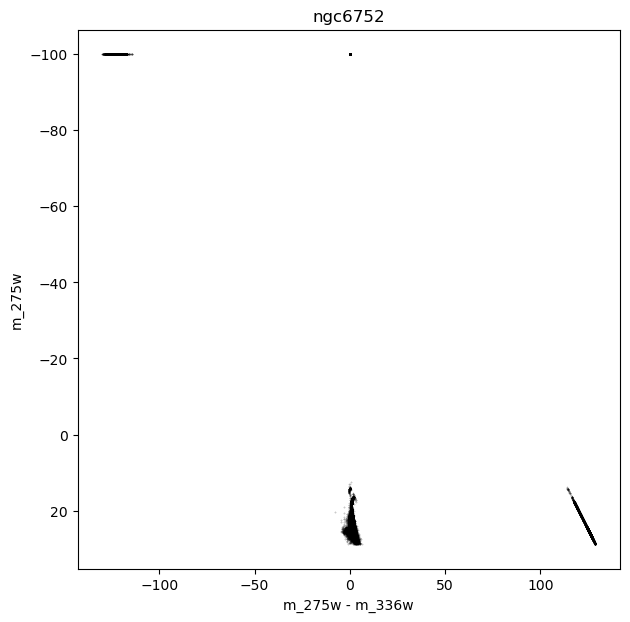

In [91]:
plt.figure(figsize = (7, 7))
plt.scatter(x = multi_df1.X3 - multi_df1.X9,
            y = multi_df1.X3,
            s = 0.1,
            c = 'Black',
            marker = '*',
            alpha = 0.2)
# plt.ylim(15.5, 26)
# plt.xlim(-1, 3.5)
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("ngc6752")
plt.gca().invert_yaxis()
plt.show()

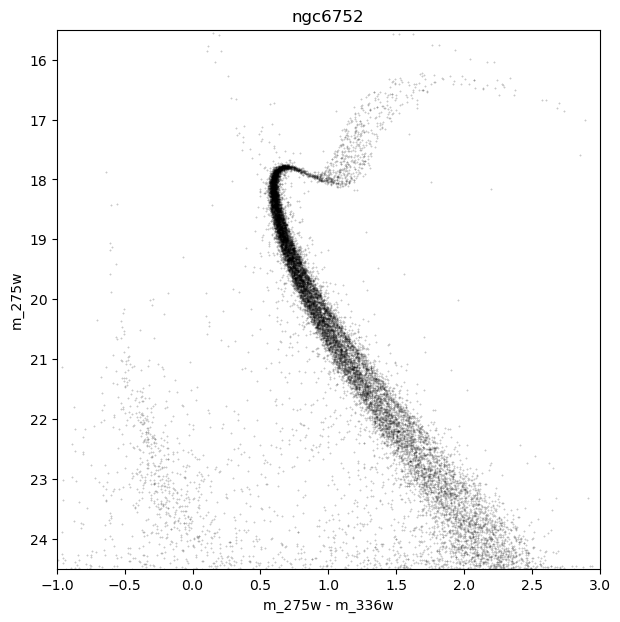

In [92]:
# 백그라운 및 아웃라이어 부근을 제외하고 구상성단 색등급도 영역 부분으로 한정지어 플랏함

plt.figure(figsize = (7, 7))
plt.scatter(x = multi_df1.X3 - multi_df1.X9,
            y = multi_df1.X3,
            s = 0.1,
            c = 'Black',
            marker = '*',
            alpha = 0.2)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("ngc6752")
plt.gca().invert_yaxis()
plt.show()

In [93]:
multi_df1["Colour(B-V)"] = multi_df1["X3"] - multi_df1["X9"]

# 백그라운드 및 불용값에 의한 연산 결과는 배제하고자 아래 조건으로 필터링을 실시
# -1 =< Colour(B-V) <= 3
# -10 =< X3 <= 30
filtered_df = multi_df1.query("`Colour(B-V)` >= -1 and `Colour(B-V)` <= 3.5 and X3 >= -10 and X3 <= 30")

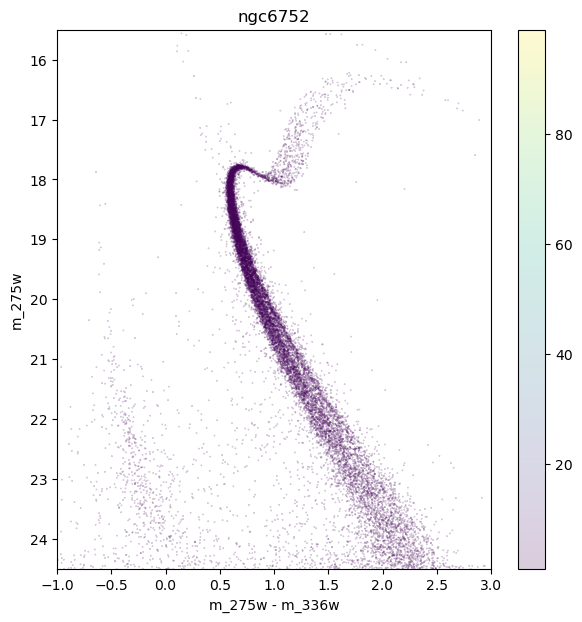

In [94]:
plt.figure(figsize = (7, 7))
plt.scatter(x = filtered_df.X3 - filtered_df.X9,
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df.X8,
            cmap = 'viridis',
            marker = '*',
            alpha = 0.2)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("ngc6752")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

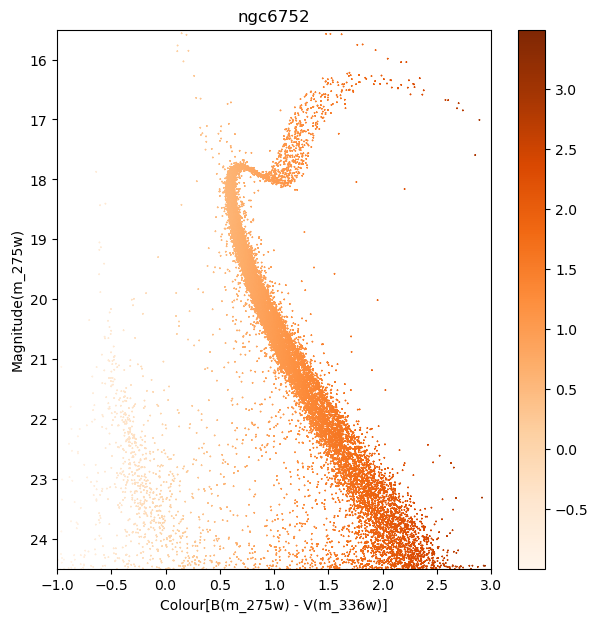

In [95]:
plt.figure(figsize = (7, 7))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'Oranges',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("ngc6752")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

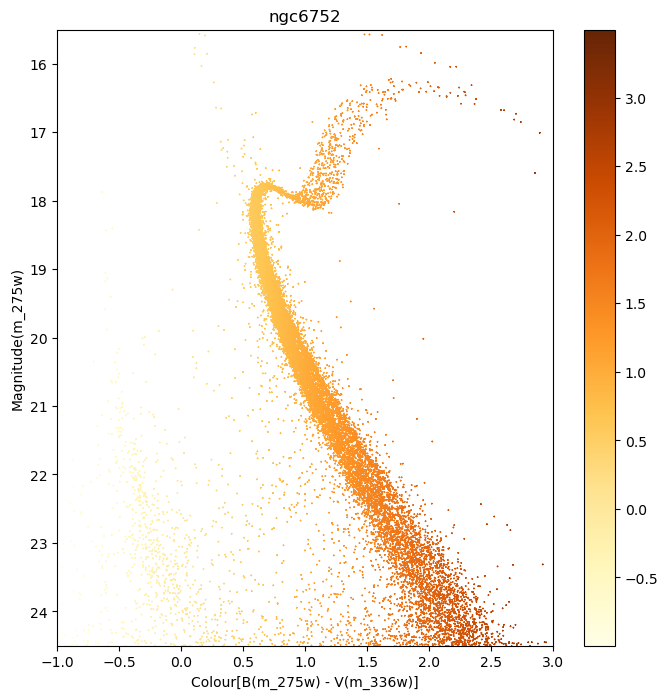

In [96]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'YlOrBr',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("ngc6752")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

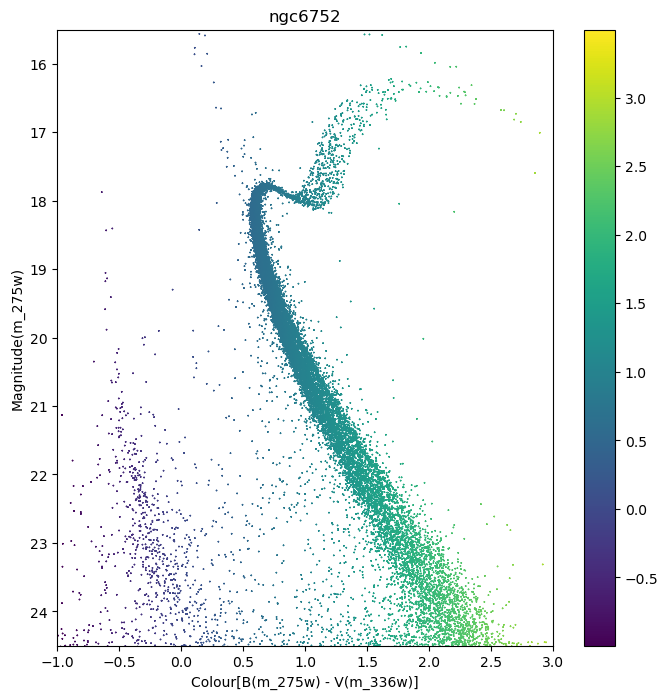

In [97]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'viridis',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("ngc6752")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

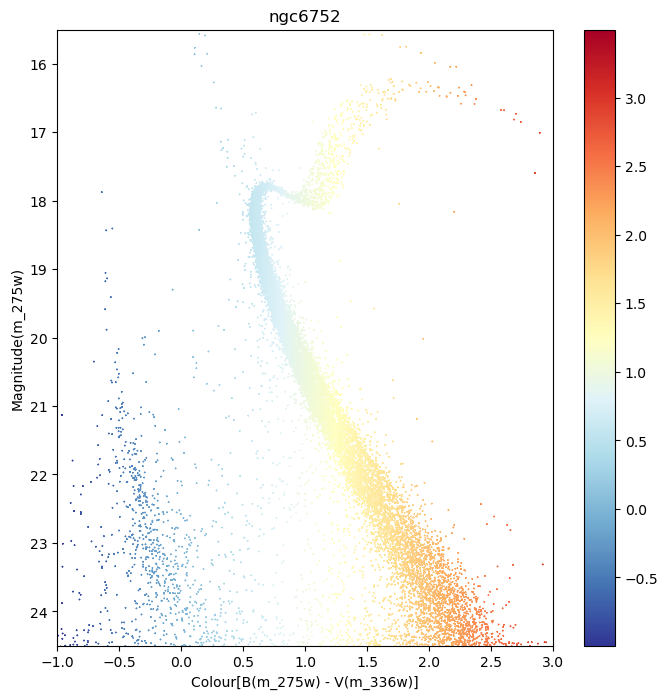

In [98]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'RdYlBu_r',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("ngc6752")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

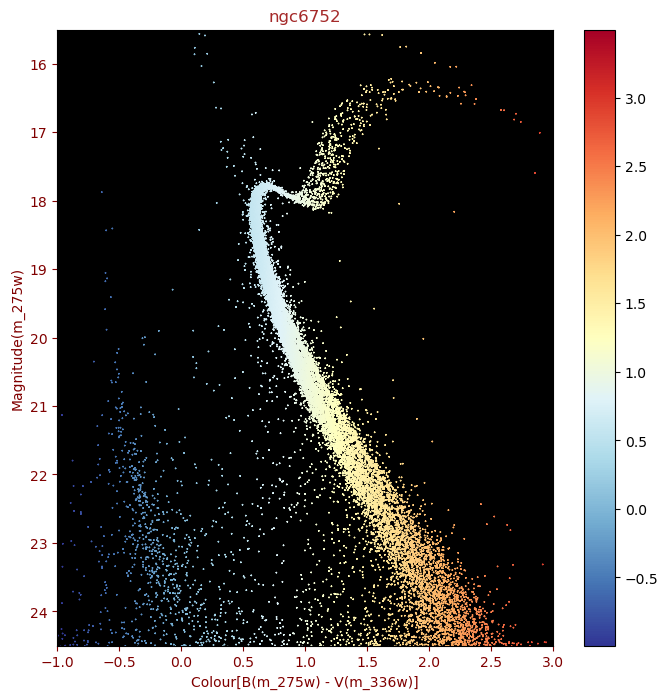

In [99]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'RdYlBu_r',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("ngc6752")
plt.colorbar()
plt.gca().invert_yaxis()

# 축의 배경색을 검은색으로 설정
plt.gca().set_facecolor('black')

# x축과 y축의 텍스트, 타이틀의 색상을 변경해야 배경과 대비
plt.xlabel("Colour[B(m_275w) - V(m_336w)]", color='maroon')
plt.ylabel("Magnitude(m_275w)", color='maroon')
plt.title("ngc6752", color='Brown')
plt.tick_params(colors='maroon')  # 축의 틱 색상을 변경

plt.show()

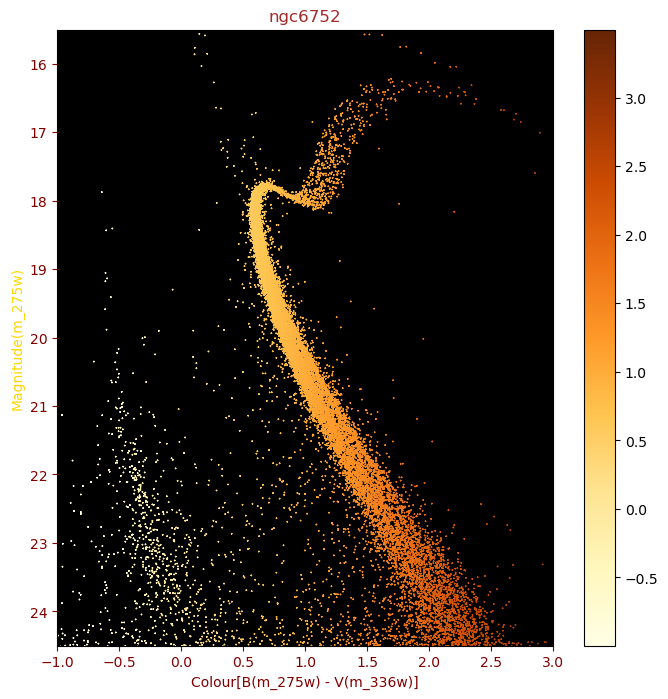

In [100]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'YlOrBr',
            marker = '*',
            alpha = 1)

plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)

plt.colorbar()
plt.gca().invert_yaxis()

# 축의 배경색을 검은색으로 설정
plt.gca().set_facecolor('black')

# x축과 y축의 텍스트, 타이틀의 색상을 변경해야 배경과 대비
plt.xlabel("Colour[B(m_275w) - V(m_336w)]", color='maroon')
plt.ylabel("Magnitude(m_275w)", color='gold')
plt.title("ngc6752", color='Brown')
plt.tick_params(colors='maroon')  # 축의 틱 색상을 변경

plt.show()

* HST UV Globular Cluster Survey ngc6752 연구 결과
  
<img src="image/ngc6752_CMD.png" width="600" height="600"/>


**비교** 위키백과의 헤르츠스프룽-러셀 도표

<img src="./image/cmd.png" width="600" height="800"/>